<a href="https://colab.research.google.com/github/CCozd/Dataset/blob/main/Predicci%C3%B3n_de_enfermedades_card%C3%ADacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/CCozd/Dataset/blob/main/images/corazon.jpg?raw=true" width="500">

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Introducción:</font></h3>

En este proyecto, profundizamos en un conjunto de datos que resume varias métricas de salud de __pacientes cardíacos__, incluida la edad, la presión arterial, la frecuencia cardíaca y más. Nuestro objetivo es desarrollar un modelo predictivo capaz de identificar con precisión a personas con enfermedades cardíacas. Dadas las graves implicaciones de omitir un diagnóstico positivo, nuestro énfasis principal es garantizar que el modelo identifique a todos los pacientes potenciales.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Objetivos:</font></h3>

* __Explorar el Dataset__: descubra patrones, distribuciones y relaciones dentro de los datos.
* __Realizar un análisis de datos exploratorio exhaustivo (EDA)__: profundice en las relaciones bivariadas con respecto al objetivo.
* __Pasos de preprocesamiento__:
  - Eliminar características irrelevantes
  - Abordar los valores faltantes
  - Tratar valores atípicos
  - Codificar variables categóricas
  - Transformar características sesgadas para lograr distribuciones similares a las normales
* __Construcción de modelos__:
  - Establecer canales para modelos que requieren escalamiento
  - Implementar y ajustar modelos de clasificación, incluidos KNN, SVM, árboles de decisión y bosque aleatorio.
  - Enfatizar el logro de un alto nivel de recuperación para la clase 1, garantizando una identificación integral de los pacientes cardíacos.
* __Evaluar y comparar el rendimiento del modelo:__: utilizar precisión, recuperación y puntuación F1 para medir la eficacia de los modelos.

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Tabla de Contenido:</font></h3>
    
* [Paso 1 | Importar Bibliotecas](#import)
* [Paso 2 | Leer conjunto de datos](#read)
* [Paso 3 | Visión general del conjunto de datos](#overview)
    - [Paso 3.1 | Información básica del conjunto de datos](#basic)
    - [Paso 3.2 Resumen estadístico de variables numéricas](#num_statistics)
    - [Paso 3.3 Estadísticas de resumen para variables categóricas](#cat_statistics)
* [Paso 4 | EDA](#eda)
    - [Paso 4.1 | Análisis Univariante](#univariante)
        - [Paso 4.1.1 | Análisis Univariante de Variables Numéricas](#num_uni)
        - [Paso 4.1.2 Análisis univariante de variables categóricas](#cat_uni)
    - [Paso 4.2 Análisis bivariado](#bivariate)
        - [Paso 4.2.1 Características Numéricas vs Objetivo](#num_target)
        - [Paso 4.2.2 Características categóricas frente al objetivo](#cat_target)
* [Paso 5 | Preprocesamiento de datos](#preprocessing)
    - [Paso 5.1: Eliminación de características irrelevantes](#feature_removal)
    - [Paso 5.2 - Tratamiento de valores perdidos](#missing)
    - [Paso 5.3 Tratamiento de valores atípicos](#outlier)
    - [Paso 5.4 Codificación de características categóricas](#encoding)
    - [Paso 5.5 Escalado de características](#escalado)
    - [Paso 5.6 Transformación de características sesgadas](#transform)
* [Paso 6 | Construcción del Modelo de Árbol de Decisión](#dt)
    - [Paso 6.1 Definición del Modelo Base DT](#dt_base)
    - [Paso 6.2 - Ajuste de hiperparámetros DT](#dt_hp)
    - [Paso 6.3 Evaluación del modelo DT](#dt_eval)
* [Paso 7 | Construcción del Modelo Random Forest](#rf)
    - [Paso 7.1: Definición del modelo base RF](#rf_base)
    - [Paso 7.2 Ajuste de hiperparámetros de RF](#rf_hp)
    - [Paso 7.3 Evaluación del modelo RF](#rf_eval)
* [Paso 8 | Construcción del Modelo KNN](#knn)
    - [Paso 8.1 Definición del modelo base KNN](#knn_base)
    - [Paso 8.2 - Ajuste de Hiperparámetros KNN](#knn_hp)
    - [Paso 8.3 Evaluación del modelo KNN](#knn_eval)
* [Paso 9 | Construcción del Modelo SVM](#svm)
    - [Paso 9.1 Definición del modelo base SVM](#svm_base)
    - [Paso 9.2 - Ajuste de hiperparámetros SVM](#svm_hp)
    - [Paso 9.3 Evaluación del modelo SVM](#svm_eval)
* [Paso 10 | Conclusión](#conclusion)

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 1 | Importar Bibliotecas</p>

⬆️ [Tabla de contenido:](#contents_tabel)

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [4]:
# Establecer la resolución de las figuras trazadas
plt.rcParams['figure.dpi'] = 200

# color de fondo y cuadrícula oscura
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 2 | Leer conjunto de datos</p>

⬆️ [Tabla de contenido](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Cargamos conjunto de datos:

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/CCozd/Dataset/main/Enfermedades_corazon.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Descripción del dataset:</font></h2>
    
| __Variable__ | __Descripción__ |
|     :---      |       :---      |      
| __age__ | Edad del paciente en años |
| __sex__ | Sexo del paciente (0 = masculino, 1 = femenino)|
| __cp__ | Tipo de dolor torácico: <br> 0: Angina típica <br> 1: Angina atípica <br> 2: Dolor no anginoso <br> 3: Asintomático |
| __trestbps__ | Presión arterial en reposo en mm Hg |
| __chol__ | Colesterol sérico en mg/dl |                     
| __fbs__ | Nivel de azúcar en sangre en ayunas, categorizado como superior a 120 mg/dl (1 = verdadero, 0 = falso) |
| __restecg__ | Resultados electrocardiográficos en reposo: <br> 0: Normal <br> 1: Tiene anomalía de la onda ST-T <br> 2: Muestra hipertrofia ventricular izquierda probable o definitiva |
| __thalach__ | Frecuencia cardíaca máxima alcanzada durante una prueba de esfuerzo |                      
| __exang__ | Angina inducida por el ejercicio (1 = sí, 0 = no) |
| __oldpeak__ | Depresión del segmento ST inducida por el ejercicio en relación con el reposo |
| __slope__ | Pendiente del segmento ST máximo en el ejercicio: <br> 0: pendiente ascendente <br> 1: plana <br> 2: pendiente descendente |                     
| __ca__ | Número de vasos principales (0-4) coloreados por fluoroscopia |             
| __thal__ | Resultado de la prueba de esfuerzo con talio: <br> 0: normal <br> 1: defecto fijo <br> 2: defecto reversible <br> 3: no descrito |
| __target__ | Estado de enfermedad cardíaca (0 = sin enfermedad, 1 = presencia de enfermedad) |

<a id="overview"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 3 | Visión general del conjunto de datos</p>

⬆️ [Tabla de contenido](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
A continuación, se dará una exploración detallada del conjunto de datos:

<a id="basic"></a>
# <b><span style='color:#ff826e'>Paso 3.1 |</span><span style='color:red'> Información básica del conjunto de datos</span></b>

In [6]:
# Resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferencias:</font></h2>

* __Número de entradas__: El conjunto de datos consta de __303 entradas__, que van desde el índice 0 al 302.

* __Columnas__: Hay __14 columnas__ en el conjunto de datos que corresponden a varios atributos de los pacientes y resultados de pruebas.

* __Tipos de datos__:
- La mayoría de las columnas (13 de 14) son del tipo de datos __int64__.
- Solo la columna oldpeak es del tipo de datos float64.

* __Valores faltantes__: No parece haber ningún valor faltante en el conjunto de datos, ya que cada columna tiene 303 entradas no nulas.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:110%; text-align:left">

__<span style="font-size:130%; color:red"> Nota: </span>__ Según los tipos de datos y las explicaciones de las características que teníamos anteriormente, podemos ver que __9 columnas__ (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` y `target`) son, de hecho, __numéricas__ en términos de tipo de datos, pero __categóricas__ en términos de su semántica. Estas características se deben convertir al tipo de datos de cadena (__object__) para un análisis e interpretación adecuados:

In [7]:
# Definir las características continuas
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identificar las características que se convertirán al tipo de datos del objeto
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convertir las características identificadas al tipo de datos de objeto
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,object
restecg,object
thalach,int64
exang,object
oldpeak,float64


<a id="num_statistics"></a>
# <b><span style='color:#ff826e'>Paso 3.2 |</span><span style='color:red'> Resumen estadístico de variables numéricas</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Profundicemos en las estadísticas de resumen de nuestros atributos __numéricos__:

In [8]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Características numéricas:</font></h3>

* ​​__`age`__: La edad media de los pacientes es de aproximadamente 54,4 años, siendo el más joven de 29 años y el mayor de 77 años.
* __`trestbps`__: La presión arterial media en reposo es de unos 131,62 mmHg, con un rango de 94 a 200 mmHg.
* __`chol`__: El nivel medio de colesterol es de aproximadamente 246,26 mg/dl, con un mínimo de 126 y un máximo de 564 mg/dl.
* __`thalach`__: La frecuencia cardíaca máxima media alcanzada es de alrededor de 149,65, con un rango de 71 a 202.
* __`oldpeak`__: La depresión media del segmento ST inducida por el ejercicio en relación con el reposo es de aproximadamente 1,04, con valores que van de 0 a 6,2.

<a id="cat_statistics"></a>
# <b><span style='color:#ff826e'>Paso 3.3 |</span><span style='color:red'> Estadísticas de resumen para variables categóricas</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

A continuación, veamos las estadísticas resumidas de las características categóricas:

In [9]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Características categóricas (tipo de datos de objeto):</font></h3>

* ​​__`sex`__: Hay dos valores únicos, siendo los hombres (indicados como 0) la categoría más frecuente, que aparece 207 veces de 303 entradas.
* __`cp`__: Hay cuatro tipos únicos de dolor en el pecho. El tipo más común es "__0__", que aparece 143 veces.
* __`fbs`__: Hay dos categorías, y la más frecuente es "__0__" (que indica un nivel de azúcar en sangre en ayunas inferior a 120 mg/dl), que aparece 258 veces.
* __`restecg`__: Hay tres resultados únicos. El resultado más común es "__1__", que aparece 152 veces.
* __`exang`__: Hay dos valores únicos. El valor más frecuente es "__0__" (que indica que no hay angina inducida por el ejercicio), que se observa 204 veces.
* __`slope`__: Hay tres pendientes únicas. El tipo de pendiente más frecuente es "__2__", que aparece 142 veces.
* __`ca`__: Hay cinco valores únicos para la cantidad de vasos principales coloreados por fluoroscopia, siendo "__0__" el más frecuente, que aparece 175 veces.
* __`thal`__: Hay cuatro resultados únicos disponibles. El tipo más común es "__2__" (que indica un defecto reversible), que se observa 166 veces.
* __`target`__: Dos valores únicos indican la presencia o ausencia de enfermedad cardíaca. El valor "__1__" (que indica la presencia de enfermedad cardíaca) es el más frecuente, observado en 165 entradas.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 4 | EDA</p>

⬆️ [Tabla de contenido](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Para nuestro __Análisis exploratorio de datos (EDA)__, lo haremos en dos pasos principales:

>__1. Análisis univariado__: Aquí, nos centraremos en una característica a la vez para comprender su distribución y rango.
>
>__2. Análisis bivariado__: En este paso, exploraremos la relación entre cada característica y la variable objetivo. Esto nos ayuda a determinar la importancia y la influencia de cada característica en el resultado objetivo.

Con estos dos pasos, nuestro objetivo es obtener información sobre las características individuales de los datos y también sobre cómo cada característica se relaciona con nuestro objetivo principal: __predecir la variable objetivo__.

<a id="univariate"></a>
# <b><span style='color:#ff826e'>Paso 4.1 |</span><span style='color:red'> Análisis univariado</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Realizamos un análisis univariado de las características del conjunto de datos, en función de su tipo de datos:

* Para __datos continuos__: empleamos histogramas para obtener información sobre la distribución de cada característica. Esto nos permite comprender la tendencia central, la dispersión y la forma de la distribución del conjunto de datos.

* Para __datos categóricos__: se utilizan gráficos de barras para visualizar la frecuencia de cada categoría. Esto proporciona una representación clara de la prominencia de cada categoría dentro de la característica respectiva.

Al emplear estas técnicas de visualización, estamos mejor posicionados para comprender las características individuales de cada característica en el conjunto de datos.

<a id="num_uni"></a>
### <b><span style='color:#ff826e'>Paso 4.1.1 |</span><span style='color:red'> Análisis univariado de variables numéricas</span></b>  

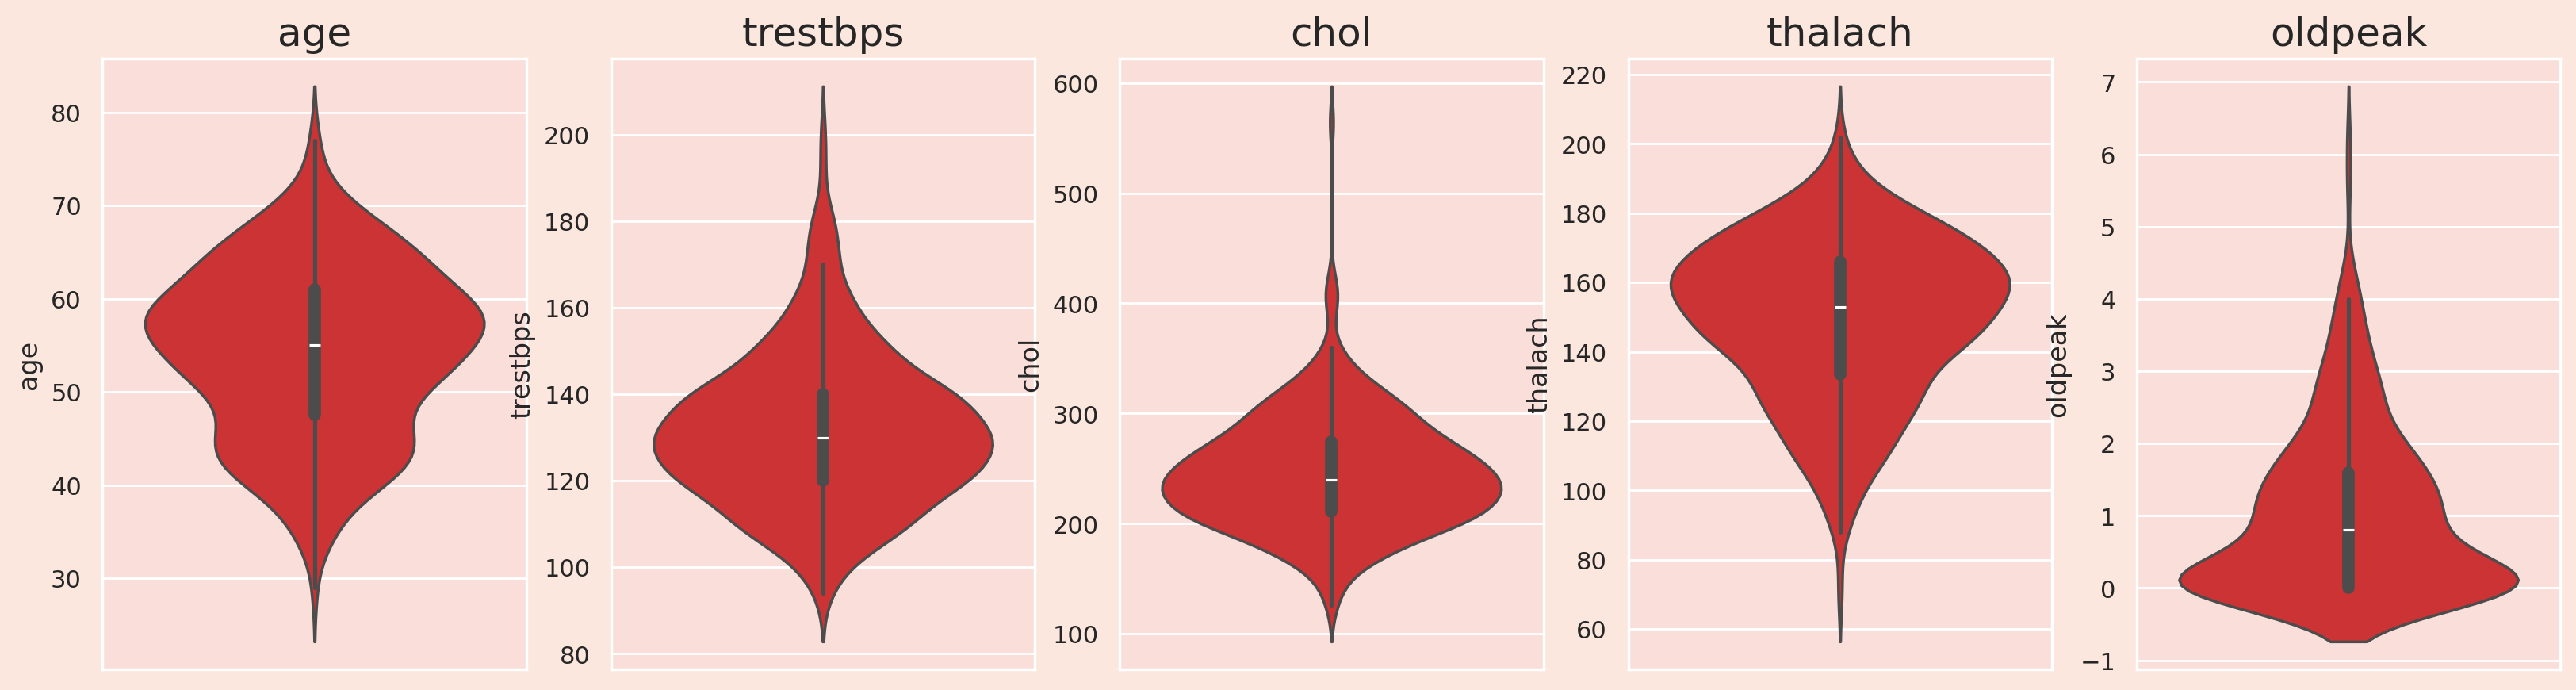

In [13]:
def plot_norm_year_wise_data(dataset):
    _,ax=plt.subplots(1,5,figsize=(20,5),facecolor="#fbe7dd")
    g=sns.violinplot(data=df,y="age",palette="Set1",ax=ax[0])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("age",fontsize=18)

    g=sns.violinplot(data=df,y="trestbps",palette="Set1",ax=ax[1])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("trestbps",fontsize=18)

    g=sns.violinplot(data=df,y="chol",palette="Set1",ax=ax[2])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("chol",fontsize=18)


    g=sns.violinplot(data=df,y="thalach",palette="Set1",ax=ax[3])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("thalach",fontsize=18)

    g=sns.violinplot(data=df,y="oldpeak",palette="Set1",ax=ax[4])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("oldpeak",fontsize=18)


plot_norm_year_wise_data(df)
plt.show()

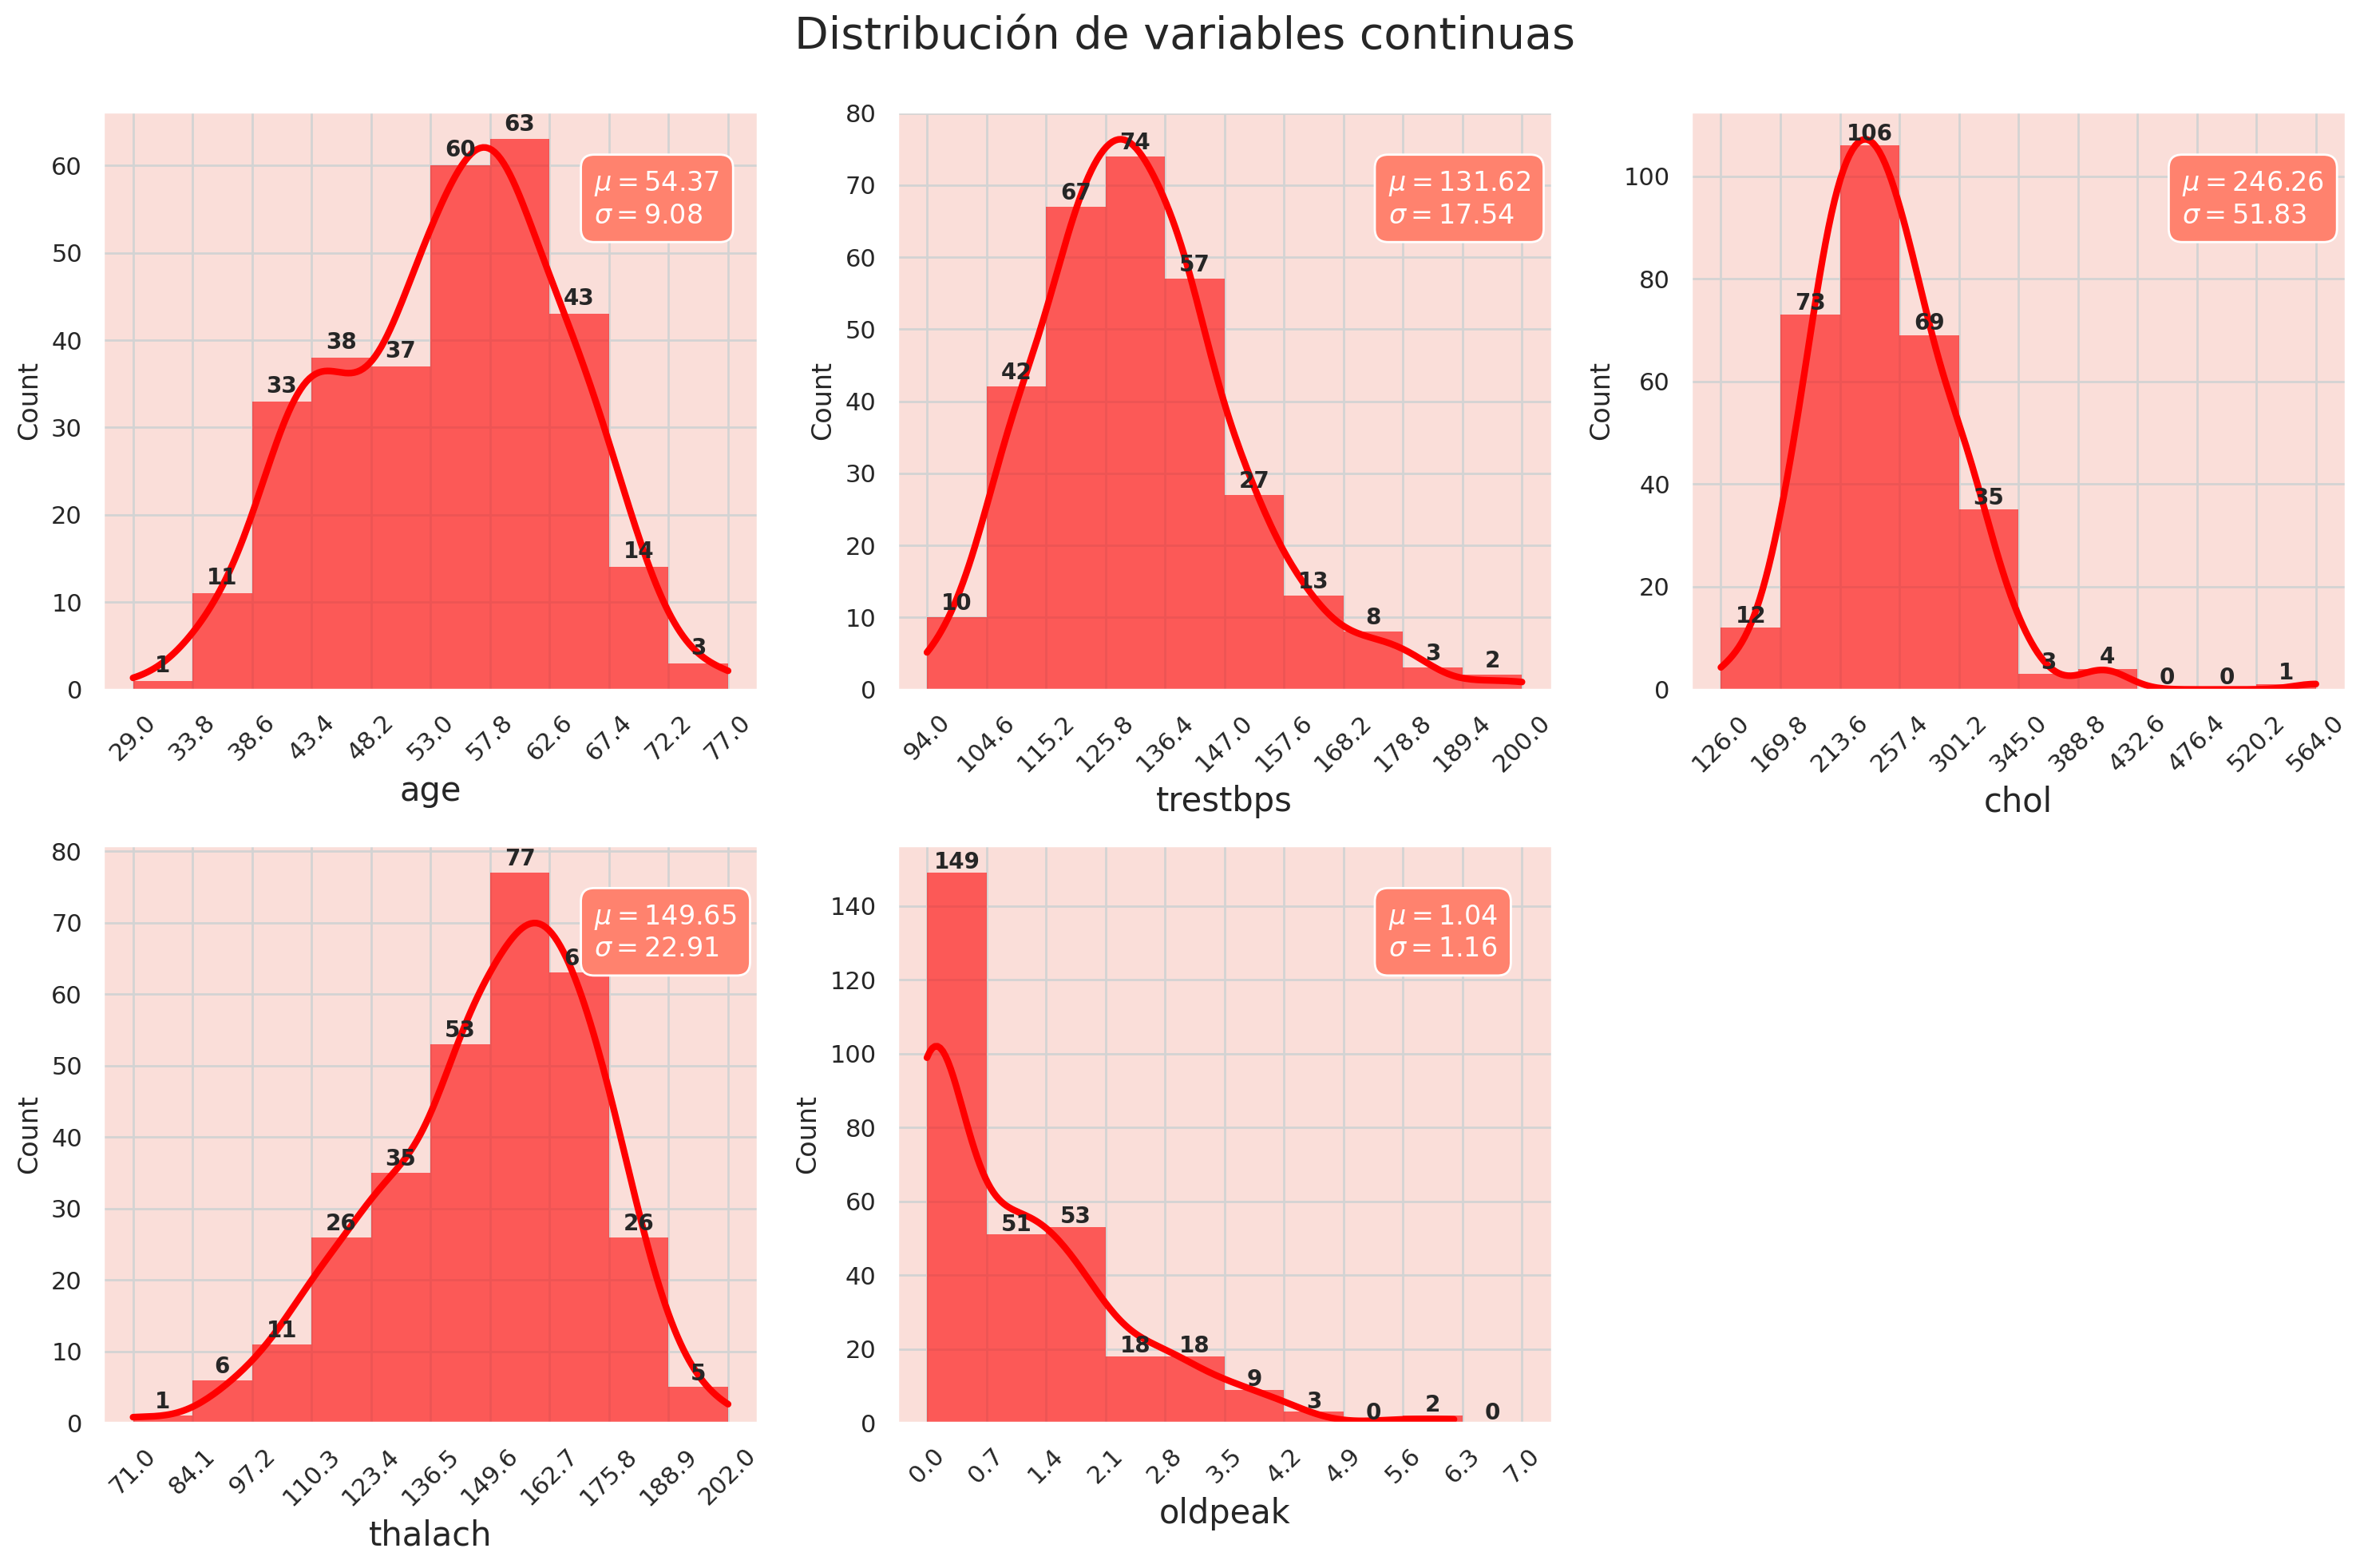

In [14]:
# Filtrar características continuas para el análisis univariado
df_continuous = df[continuous_features]

# Configurar la subtrama
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Bucle para trazar histogramas para cada característica continua
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribución de variables continuas', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferencias:</font></h2>

* __Edad (`age`)__: La distribución es algo uniforme, pero hay un pico alrededor de los 50 años. La edad media es de aproximadamente 54,37 años con una desviación estándar de 9,08 años.

* __Presión arterial en reposo (`trestbps`)__: La presión arterial en reposo para la mayoría de las personas se concentra alrededor de 120-140 mm Hg, con una media de aproximadamente 131,62 mm Hg y una desviación estándar de 17,54 mm Hg.

* __Colesterol sérico (`chol`)__: La mayoría de las personas tienen niveles de colesterol entre 200 y 300 mg/dl. El nivel medio de colesterol es de alrededor de 246,26 mg/dl con una desviación estándar de 51,83 mg/dl.

* __Frecuencia cardíaca máxima alcanzada (`thalach`)__: La mayoría de las personas alcanzan una frecuencia cardíaca entre 140 y 170 lpm durante una prueba de esfuerzo. La frecuencia cardíaca media alcanzada es de aproximadamente 149,65 lpm con una desviación estándar de 22,91 lpm.

* __Depresión del segmento ST inducida por el ejercicio (`oldpeak`)__: La mayoría de los valores se concentran en 0, lo que indica que muchas personas no experimentaron una depresión significativa del segmento ST durante el ejercicio. El valor medio de depresión del segmento ST es 1,04 con una desviación estándar de 1,16.

____

Al revisar los histogramas de las características continuas y compararlos con las descripciones de las características proporcionadas, todo parece coherente y dentro de los rangos esperados. __No parece haber ningún ruido perceptible ni valores inverosímiles entre las variables continuas.__

<a id="cat_uni"></a>
### <b><span style='color:#ff826e'>Paso 4.1.2 |</span><span style='color:red'> Análisis univariado de variables categóricas</span></b>  

In [15]:
# Filtrar características categóricas para el análisis univariado
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

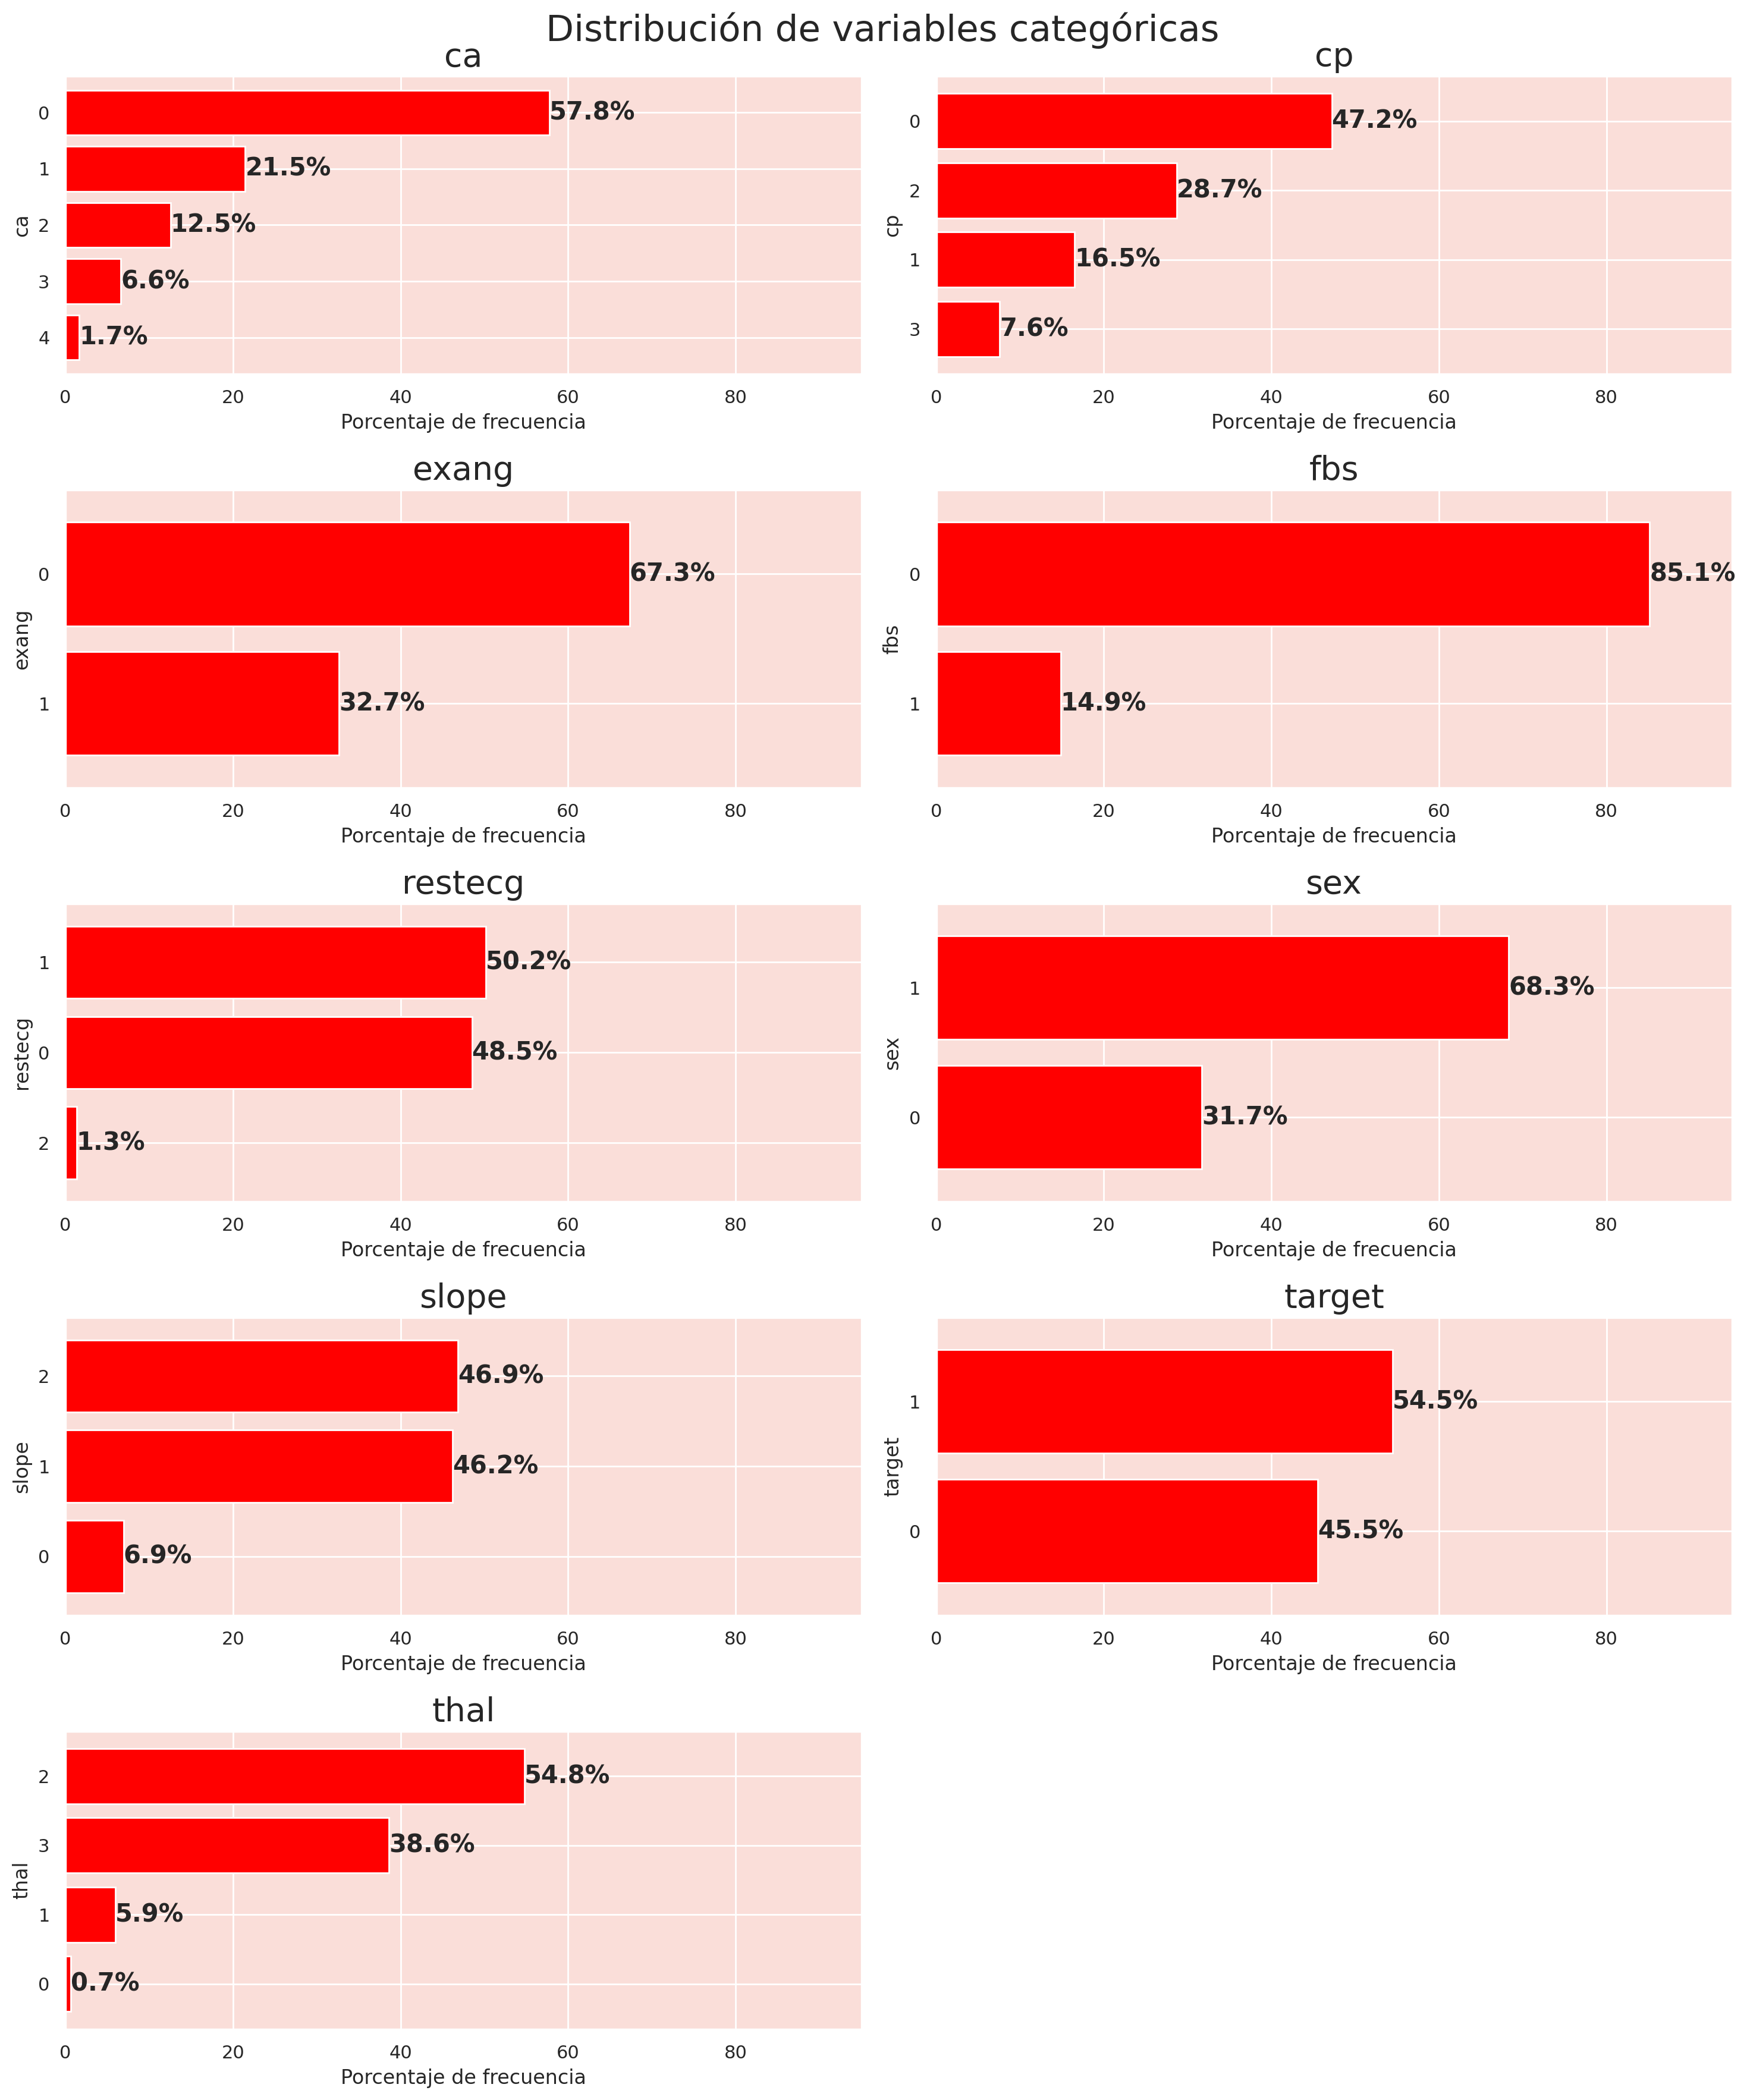

In [16]:
# Configurar la subparcela para un diseño de 4x2
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Bucle para trazar gráficos de barras para cada característica categórica en el diseño 4x2
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calcular porcentajes de frecuencia
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # gráfico de barras
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # porcentajes de frecuencia a las barras
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Porcentaje de frecuencia', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribución de variables categóricas', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:112%; text-align:left">

<h2 align="left"><font color=red>Inferencias:</font></h2>

* __Género (`sex`)__: El conjunto de datos es predominantemente femenino, lo que constituye una mayoría significativa.

* __Tipo de dolor torácico (`cp`)__: El conjunto de datos muestra diversos tipos de dolor torácico entre los pacientes. El tipo 0 (angina típica) parece ser el más frecuente, pero se puede inferir una distribución exacta entre los tipos a partir de los gráficos de barras.

* __Glucemia en ayunas (`fbs`)__: Una mayoría significativa de los pacientes tienen un nivel de glucemia en ayunas inferior a 120 mg/dl, lo que indica que la glucemia alta no es una afección común en este conjunto de datos.

* __Resultados electrocardiográficos en reposo (`restecg`)__: Los resultados muestran diversos resultados electrocardiográficos en reposo, y algunos tipos son más comunes que otros. La distribución exacta se puede medir a partir de los gráficos.

* __Angina inducida por el ejercicio (`exang`)__: La mayoría de los pacientes no sufren angina inducida por el ejercicio, lo que sugiere que podría no ser un síntoma común entre los pacientes de este conjunto de datos.

* __Pendiente del segmento ST máximo durante el ejercicio (`slope`)__: El conjunto de datos muestra diferentes pendientes del segmento ST máximo durante el ejercicio. Un tipo específico podría ser más común y su distribución se puede inferir a partir de los gráficos de barras.

* __Número de vasos principales coloreados por fluoroscopia (`ca`)__: La mayoría de los pacientes tienen menos vasos principales coloreados por fluoroscopia, siendo '0' el más frecuente.

* __Resultado de la prueba de esfuerzo con talio (`thal`)__: El conjunto de datos muestra una variedad de resultados de la prueba de esfuerzo con talio. Un tipo en particular parece ser más frecuente, pero la distribución exacta se puede ver en los gráficos.

* __Presencia de enfermedad cardíaca (`objetivo`)__: El __conjunto de datos está casi equilibrado__ en términos de presencia de enfermedad cardíaca, con aproximadamente el 54,5% que la tiene y el 45,5% que no la tiene.

____
<a id="bivariate"></a>
# <b><span style='color:#ff826e'>Paso 4.2 |</span><span style='color:red'> Análisis bivariado</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Para nuestro __análisis bivariado__ de las características del conjunto de datos con respecto a la variable objetivo:

* Para __datos continuos__: voy a utilizar __gráficos de barras__ para mostrar el valor promedio de cada característica para las diferentes clases objetivo, y __gráficos de KDE__ para comprender la distribución de cada característica en las clases objetivo. Esto ayuda a discernir cómo varía cada característica entre los dos resultados objetivo.

* Para __datos categóricos__: voy a emplear __gráficos de barras apiladas al 100%__ para representar la proporción de cada categoría en las clases objetivo. Esto ofrece una visión integral de cómo las diferentes categorías dentro de una característica se relacionan con el objetivo.

A través de estas técnicas de visualización, vamos a obtener una comprensión más profunda de la relación entre las características individuales y el objetivo, revelando posibles predictores de enfermedades cardíacas.

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Paso 4.2.1 |</span><span style='color:red'> Características numéricas vs. Target</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
Voy a visualizar cada característica continua en relación con el objetivo utilizando dos tipos de gráficos:

* __Gráficos de barras__: muestran los valores medios.
* __Gráficos de KDE__: muestran la distribución para cada categoría del objetivo.

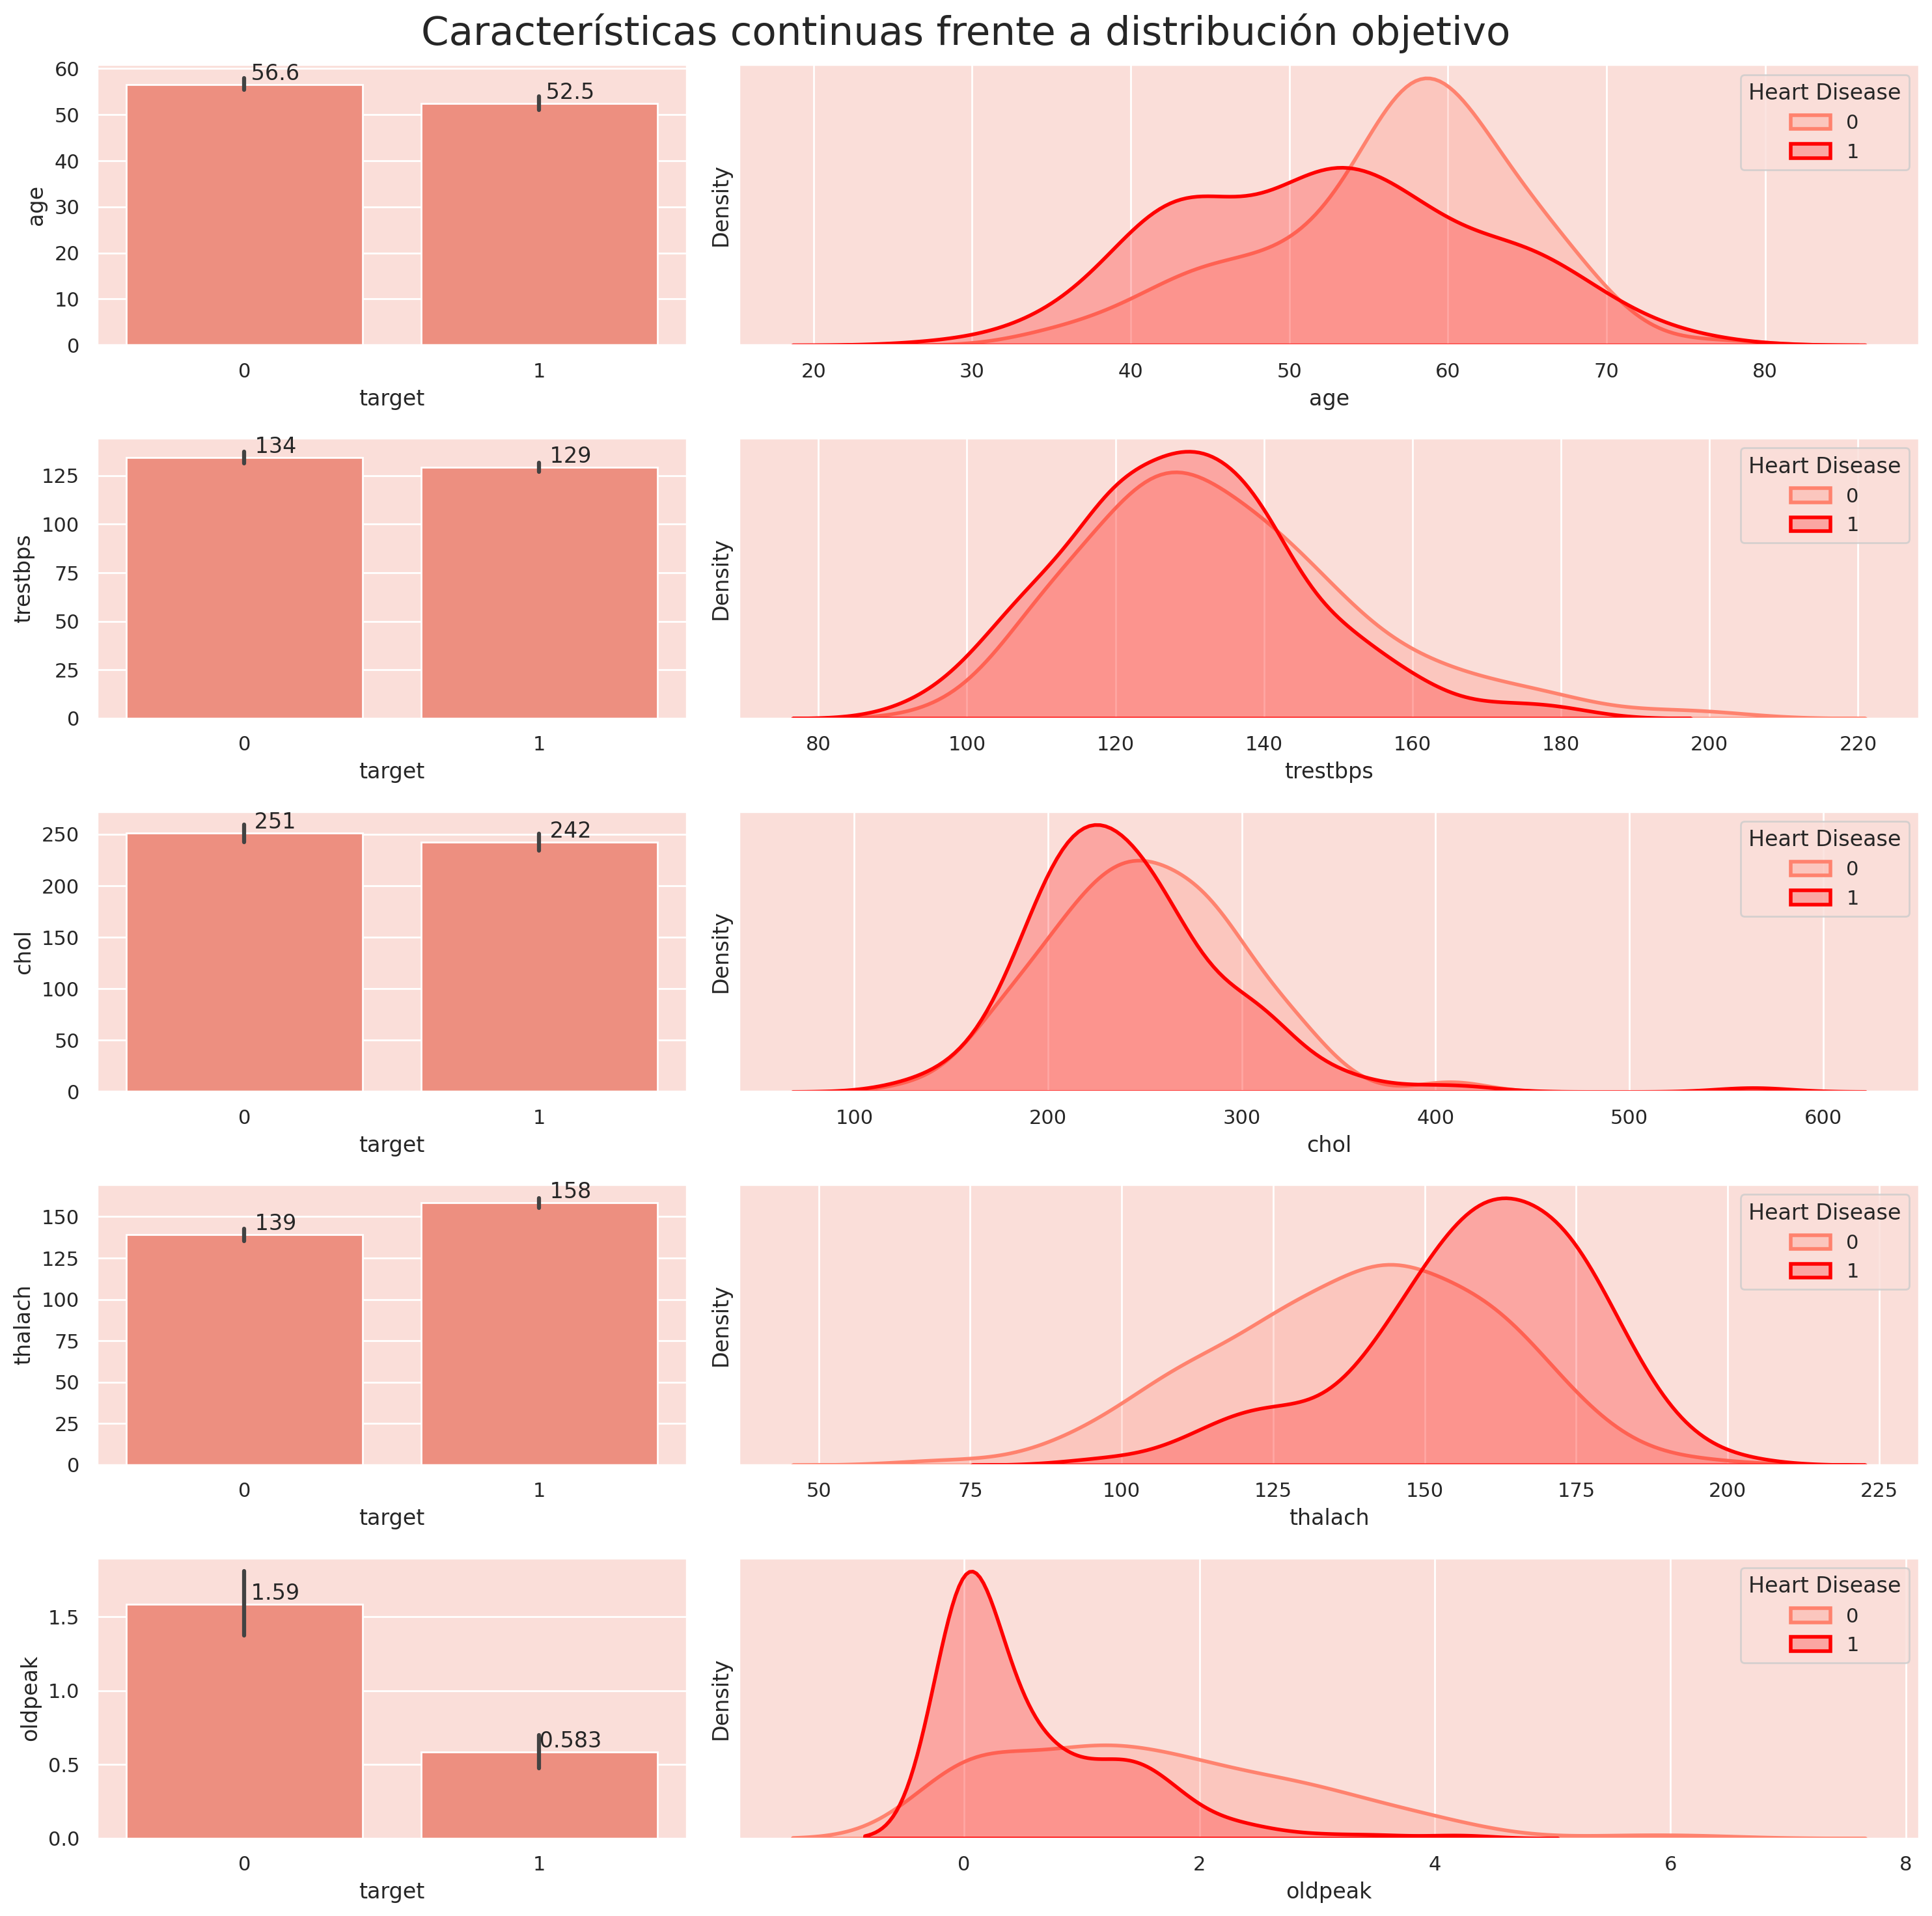

In [17]:
# paleta de colores
sns.set_palette(['#ff826e', 'red'])

# Crear las subtramas
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Recorrer cada característica continua para crear gráficos de barras y gráficos de KDE
for i, col in enumerate(continuous_features):
    # Diagrama de barras que muestra el valor medio de la característica para cada categoría objetivo
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    # Gráfico de KDE que muestra la distribución de la función para cada categoría de destino
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Agregar valores medios al gráfico de barras
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Título para toda la figura
plt.suptitle('Características continuas frente a distribución objetivo', fontsize=22)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferencias:</font></h2>

* __Edad (`age`)__: Las distribuciones muestran un ligero cambio, ya que los pacientes con cardiopatías son un poco más jóvenes en promedio que los que no la padecen. La edad media de los pacientes sin cardiopatías es mayor.

* __Presión arterial en reposo (`trestbps`)__: Ambas categorías muestran distribuciones superpuestas en el gráfico de KDE, con valores medios casi idénticos, lo que indica un poder de diferenciación limitado para esta característica.

* __Colesterol sérico (`chol`)__: Las distribuciones de los niveles de colesterol para ambas categorías son bastante similares, pero el nivel medio de colesterol para los pacientes con cardiopatías es ligeramente inferior.

* __Frecuencia cardíaca máxima alcanzada (`thalach`)__: Hay una diferencia notable en las distribuciones. Los pacientes con cardiopatías tienden a alcanzar una frecuencia cardíaca máxima más alta durante las pruebas de esfuerzo en comparación con los que no la padecen.

* __Depresión del segmento ST (`oldpeak`)__: La depresión del segmento ST inducida por el ejercicio en relación con el reposo es notablemente menor en pacientes con cardiopatías. Su distribución alcanza un máximo cercano a cero, mientras que la categoría sin enfermedad tiene una distribución más amplia.

____

Según la diferencia visual en las distribuciones y los valores medios, la __Frecuencia cardíaca máxima (`thalach`)__ parece tener el mayor impacto en el estado de la cardiopatía, seguida de la __Depresión del segmento ST (`oldpeak`)__ y la __Edad (`age`)__.

____
<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Paso 4.2.2 |</span><span style='color:red'> Características categóricas vs.Target</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Voy a mostrar __gráficos de barras apiladas al 100%__ para cada característica categórica que ilustran la proporción de cada categoría en las dos clases objetivo, complementadas con los recuentos y porcentajes exactos en las barras.

In [18]:
# Eliminar 'target' de categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

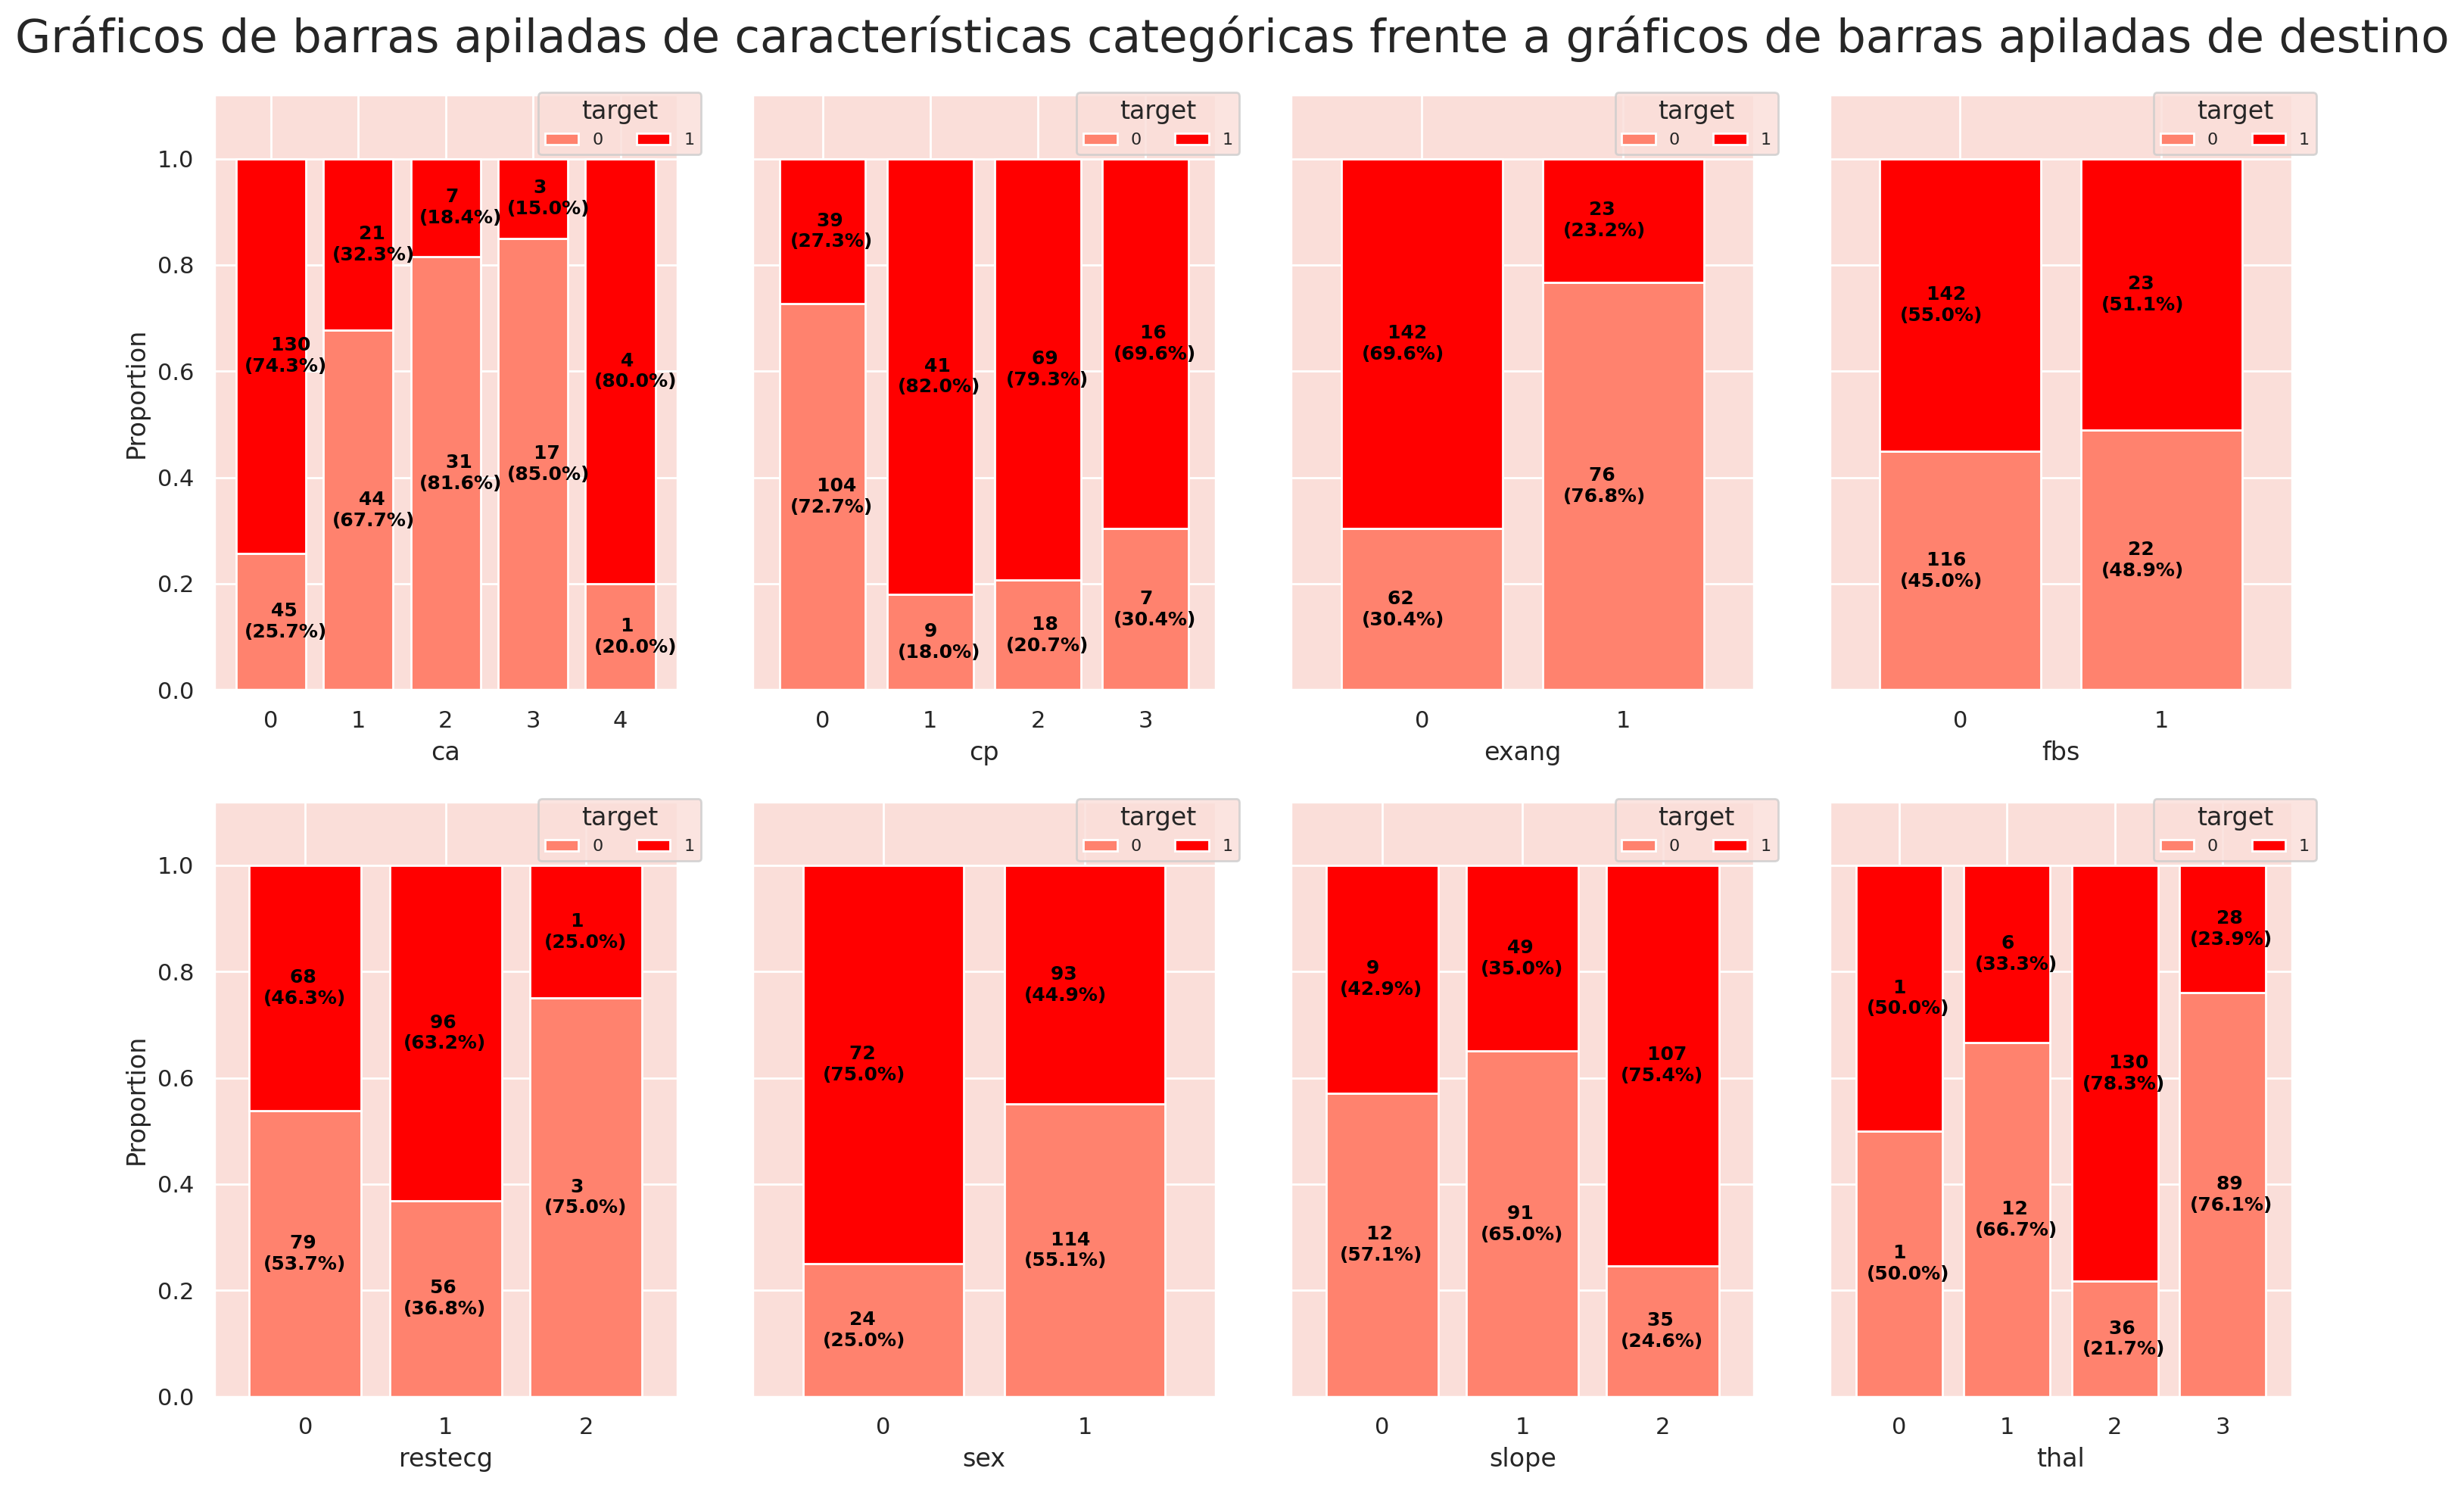

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):

    # Tabulación cruzada que muestre la proporción de préstamos comprados y no comprados para cada categoría de la función.
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])

    # El uso del argumento normalize=True nos da la proporción de los datos por índice
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Definir mapa de colores
    cmp = ListedColormap(['#ff826e', 'red'])

    # Trazar gráficos de barras apiladas
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Proporciones y recuentos de las barras individuales a nuestro gráfico
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Agregar leyenda
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Establecer el límite "y"
    ax[x,y].set_ylim([0,1.12])
    # Rotar xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Gráficos de barras apiladas de características categóricas frente a gráficos de barras apiladas de destino', fontsize=22)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferencias:</font></h2>

* __Número de vasos principales (`ca`)__: La mayoría de los pacientes con enfermedad cardíaca tienen menos vasos principales coloreados por fluoroscopia. A medida que aumenta el número de vasos coloreados, la proporción de pacientes con enfermedad cardíaca tiende a disminuir. En particular, los pacientes con 0 vasos coloreados tienen una mayor proporción de presencia de enfermedad cardíaca.

* __Tipo de dolor torácico (`cp`)__: Los diferentes tipos de dolor torácico presentan proporciones variadas de enfermedad cardíaca. En particular, los tipos 1, 2 y 3 tienen una mayor proporción de presencia de enfermedad cardíaca en comparación con el tipo 0. Esto sugiere que el tipo de dolor torácico puede influir en la predicción de la enfermedad.

* __Angina inducida por el ejercicio (`exang`)__: Los pacientes que no experimentaron angina inducida por el ejercicio (0) muestran una mayor proporción de presencia de enfermedad cardíaca en comparación con los que sí la experimentaron (1). Esta característica parece tener un impacto significativo en el objetivo.

* __Glucemia en ayunas (`fbs`)__: La distribución entre aquellos con glucemia en ayunas > 120 mg/dl (1) y aquellos sin ella (0) es relativamente similar, lo que sugiere que `fbs` podría tener un impacto limitado en la predicción de enfermedades cardíacas.

* __Resultados electrocardiográficos en reposo (`restecg`)__: El tipo 1 muestra una mayor proporción de presencia de enfermedades cardíacas, lo que indica que esta característica podría tener cierta influencia en el resultado.

* __Sexo (`sex`)__: Las mujeres (1) muestran una menor proporción de presencia de enfermedades cardíacas en comparación con los hombres (0). Esto indica que el género es un factor influyente en la predicción de enfermedades cardíacas.

* __Pendiente del segmento ST de ejercicio máximo (`slope`)__: La pendiente tipo 2 tiene una proporción notablemente mayor de presencia de enfermedades cardíacas, lo que indica su potencial como predictor significativo.

* __Resultado de la prueba de estrés con talio (`thal`)__: La categoría de defecto reversible (2) tiene una mayor proporción de presencia de enfermedad cardíaca en comparación con las otras categorías, lo que enfatiza su importancia en la predicción.

____

En resumen, según la representación visual:

* __Mayor impacto en el objetivo: `ca`, `cp`, `exang`, `sex`, `slope` y `thal`__
* __Impacto moderado en el objetivo: `restecg`__
* __Menor impacto en el objetivo: `fbs`__

<a id="preprocessing"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 5 | Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'>Paso 5.1 |</span><span style='color:red'> Eliminación de características irrelevantes</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Todas las características del conjunto de datos parecen ser relevantes según nuestro __EDA__. Ninguna columna parece redundante o irrelevante. Por lo tanto, conservaremos todas las características, lo que garantizará que no se pierda información valiosa, especialmente dado el pequeño tamaño del conjunto de datos.

____
<a id="missing"></a>
# <b><span style='color:#ff826e'>Paso 5.2 |</span><span style='color:red'> Tratamiento de valores faltantes</span></b>

In [20]:
# Verificar valores faltantes en el conjunto de datos
df.isnull().sum().sum()

0

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
Tras la inspección anterior, resulta evidente que no faltan valores en nuestro conjunto de datos. Esto es ideal, ya que significa que no tenemos que tomar decisiones sobre imputación o eliminación, lo que puede introducir sesgos o reducir el tamaño ya limitado de nuestro conjunto de datos.

____
<a id="outlier"></a>
# <b><span style='color:#ff826e'>Paso 5.3 |</span><span style='color:red'> Tratamiento de valores atípicos</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Voy a comprobar si hay valores atípicos utilizando el método _ IQR para las características continuas:

In [21]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [22]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

,0
age,0
trestbps,9
chol,5
thalach,1
oldpeak,5


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Al identificar valores atípicos para las características continuas especificadas, encontramos lo siguiente:

* __`trestbps`__: 9 valores atípicos
* __`chol`__: 5 valores atípicos
* __`thalach`__: 1 valor atípico
* __`oldpeak`__: 5 valores atípicos
* __`age`__: Sin valores atípicos

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Sensibilidad a los valores atípicos:</font></h3>

* ​​__SVM (máquina de vectores de soporte)__: las SVM pueden ser sensibles a los valores atípicos. Si bien el límite de decisión está determinado principalmente por los vectores de soporte, los valores atípicos pueden influir en los puntos de datos que se eligen como vectores de soporte, lo que puede llevar a una clasificación subóptima.

* __Árboles de decisión (DT) y bosques aleatorios (RF)__: estos algoritmos basados ​​en árboles son generalmente robustos a los valores atípicos. Realizan divisiones basadas en valores de características y los valores atípicos a menudo terminan en nodos de hoja, lo que tiene un impacto mínimo en el proceso general de toma de decisiones.

* __K vecinos más cercanos (KNN)__: KNN es sensible a los valores atípicos porque se basa en las distancias entre los puntos de datos para hacer predicciones. Los valores atípicos pueden distorsionar estas distancias.

* __AdaBoost:__ Este método de conjunto, que a menudo utiliza árboles de decisión como aprendices débiles, generalmente es robusto a los valores atípicos. Sin embargo, la naturaleza iterativa de AdaBoost a veces puede llevar a un énfasis excesivo en los valores atípicos, lo que hace que el modelo final sea más sensible a ellos.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Métodos para el tratamiento de valores atípicos:</font></h3>

* ​​__Eliminación de valores atípicos__: descartar directamente los puntos de datos que se encuentran fuera de un rango definido, generalmente según un método como el rango intercuartil (RIC).

* __Limitar los valores atípicos__: en lugar de eliminarlos, podemos limitar los valores atípicos a un umbral determinado, como el percentil 1 o 99.

* __Transformaciones__: aplicar transformaciones como log o Box-Cox puede reducir el impacto de los valores atípicos y hacer que los datos sean más parecidos a los de Gauss.

* __Escalado robusto__: se pueden utilizar técnicas como RobustScaler en Scikit-learn, que escala las características utilizando estadísticas que son robustas a los valores atípicos.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Conclusión:</font></h3>

Dada __la naturaleza de los algoritmos (especialmente SVM y KNN)__ y __el pequeño tamaño de nuestro conjunto de datos__, la eliminación directa de valores atípicos podría no ser el mejor enfoque. En cambio, __nos centraremos en aplicar transformaciones como Box-Cox en los pasos posteriores__ para reducir el impacto de los valores atípicos y hacer que los datos sean más adecuados para el modelado.

____
<a id="encoding"></a>
# <b><span style='color:#ff826e'>Paso 5.4 |</span><span style='color:red'> Codificación de características categóricas</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:112%; text-align:left">

<h3 align="left"><font color=red>Decisión de codificación one-hot:</font></h3>

En función de las descripciones de las características, decidamos la codificación one-hot:

1. __Variables nominales__: son variables sin un orden inherente. Deben codificarse one-hot porque usarlas como números puede introducir un orden no deseado en el modelo.

2. __Variables ordinales__: estas variables tienen un orden inherente. No es necesario que se codifiquen one-hot, ya que su orden puede proporcionar información significativa al modelo.

Dada la explicación anterior:

- __`sex`__: esta es una variable binaria con dos categorías (masculino y femenino), por lo que no necesita codificación one-hot.

- __`cp`__: el tipo de dolor de pecho se puede considerar nominal porque no hay una relación ordinal clara entre los diferentes tipos de dolor de pecho (como angina típica, angina atípica, etc.). Debe codificarse one-hot.

- __`fbs`__: Esta es una variable binaria (verdadero o falso), por lo que no necesita codificación one-hot.

- __`restecg`__: Esta variable representa los resultados electrocardiográficos en reposo. Los resultados, como "Normal", "Con anomalía de la onda ST-T" y "Mostrando hipertrofia ventricular izquierda probable o definitiva", no parecen tener una relación ordinal. Por lo tanto, debe codificarse one-hot.

- __`exang`__: Esta es una variable binaria (sí o no), por lo que no necesita codificación one-hot.

- __`slope`__: Representa la pendiente del segmento ST máximo durante el ejercicio. Dadas las descripciones (pendiente ascendente, plana, pendiente descendente), parece tener una naturaleza ordinal, lo que sugiere un orden particular. Por lo tanto, no necesita codificarse one-hot.

- __`ca`__: Representa la cantidad de vasos principales coloreados por fluoroscopia. Como indica un recuento, tiene una relación ordinal inherente. Por lo tanto, no necesita ser codificado en uno.

- __`thal`__: Esta variable representa el resultado de una prueba de estrés de talio. Los diferentes estados, como "Normal", "Defecto corregido" y "Defecto reversible", sugieren una naturaleza nominal. Por lo tanto, debe ser codificado en uno.

<h4 align="left">Resumen:</h4>

- __Necesita codificación en uno__: __`cp`__, __`restecg`__, __`thal`__
- __No necesita codificación en uno__: __`sex`__, __`fbs`__, __`exang`__, __`slope`__, __`ca`__

In [23]:
# Implementación de codificación one-hot en las características categóricas especificadas
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convierte el resto de las variables categóricas que no necesitan codificación one-hot a tipo de datos entero
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64
ca,int64


In [24]:
# Visualización del DataFrame resultante después de la codificación one-hot
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


____
<a id="scaling"></a>
# <b><span style='color:#ff826e'>Paso 5.5 |</span><span style='color:red'> Escalado de características</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

El __escalamiento de características__ es un paso de preprocesamiento crucial __para algoritmos que son sensibles a la magnitud o escala de las características__. Los modelos como __SVM__, __KNN__ y muchos modelos lineales dependen de distancias o gradientes, lo que los hace susceptibles a variaciones en las escalas de las características. __El escalamiento garantiza que todas las características contribuyan por igual a la decisión del modelo en lugar de estar dominadas por características con magnitudes mayores.__

____
<h3 align="left"><font color=red>Por qué lo omitimos ahora:</font></h3>

Si bien el escalamiento de características es vital para algunos modelos, no todos los algoritmos requieren datos escalados. Por ejemplo, los __modelos basados ​​en árboles de decisión__ son invariantes en cuanto a la escala. Dada nuestra intención de utilizar una combinación de modelos (algunos que requieren escalamiento, otros no), __hemos optado por manejar el escalamiento más adelante mediante pipelines__. Este enfoque nos permite aplicar el escalamiento específicamente para los modelos que se benefician de él, lo que garantiza flexibilidad y eficiencia en nuestro proceso de modelado.

____
<a id="transform"></a>
# <b><span style='color:#ff826e'>Paso 5.6 |</span><span style='color:red'> Transformación de características sesgadas</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

La transformación __Box-Cox__ es un método poderoso para estabilizar la varianza y hacer que los datos se asemejen más a una distribución normal. Es particularmente útil cuando no se está seguro de la naturaleza exacta de la distribución con la que se está tratando, ya que puede adaptarse a la mejor transformación de potencia. Sin embargo, la transformación Box-Cox solo funciona para datos positivos, por lo que se debe tener cuidado al aplicarla a características que contienen ceros o valores negativos.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
<h3 align="left"><font color=red>Problemas de transformación de características sesgadas y fuga de datos:</font></h3>

Al preprocesar datos, especialmente al aplicar transformaciones como Box-Cox, es fundamental tener cuidado con la __fuga de datos__. La __fuga de datos__ se refiere a un error en el preprocesamiento de datos en el que se utiliza información externa al conjunto de datos de entrenamiento para transformar o entrenar el modelo. Esto puede generar métricas de rendimiento demasiado optimistas.

<h3 align="left"><font color=red>Para evitar la fuga de datos y garantizar que nuestro modelo se generalice bien a datos no vistos:</font></h3>

__1- División de datos:__ Primero dividiremos nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. Esto garantiza que tengamos un conjunto de datos separado para evaluar el rendimiento de nuestro modelo, sin modificar durante las fases de entrenamiento y preprocesamiento.

__2- Transformación de Box-Cox:__ Examinaremos la distribución de las características continuas en el conjunto de entrenamiento. Si parecen sesgadas, aplicaremos la transformación de Box-Cox para estabilizar la varianza y hacer que los datos se asemejen más a una distribución normal. Es importante destacar que determinaremos los parámetros de la transformación de Box-Cox únicamente en función de los datos de entrenamiento.

__3- Aplicación de transformaciones a los datos de prueba:__ Una vez que se determinen nuestros parámetros de transformación a partir del conjunto de entrenamiento, utilizaremos estos parámetros exactos para transformar nuestro conjunto de validación/prueba. Este enfoque garantiza que ninguna información del conjunto de validación/prueba se filtre en nuestro proceso de entrenamiento.

__4. Ajuste de hiperparámetros y validación cruzada:__ Dado el tamaño de nuestro conjunto de datos, para aprovechar al máximo los datos disponibles durante la fase de entrenamiento del modelo, emplearemos __validación cruzada en el conjunto de entrenamiento para el ajuste de hiperparámetros__. Esto nos permite tener una mejor idea de cómo podría funcionar nuestro modelo en datos no vistos, sin utilizar realmente el conjunto de prueba. El conjunto de pruebas permanece intacto durante esta fase y solo se utiliza para evaluar el rendimiento del modelo final.

Al seguir este enfoque estructurado, garantizamos un proceso de entrenamiento riguroso, minimizamos el riesgo de fuga de datos y nos preparamos para obtener una medida realista del rendimiento de nuestro modelo con datos no vistos.

In [25]:
# Define las características (X) y las etiquetas de salida (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [26]:
# División de datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [27]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
La transformación de Box-Cox requiere que todos los datos sean estrictamente positivos. Para transformar la característica `oldpeak` mediante Box-Cox, podemos agregar una pequeña constante (por ejemplo, 0,001) para garantizar que todos los valores sean positivos:

In [28]:
# Agregar una pequeña constante a 'oldpeak' para que todos los valores sean positivos
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

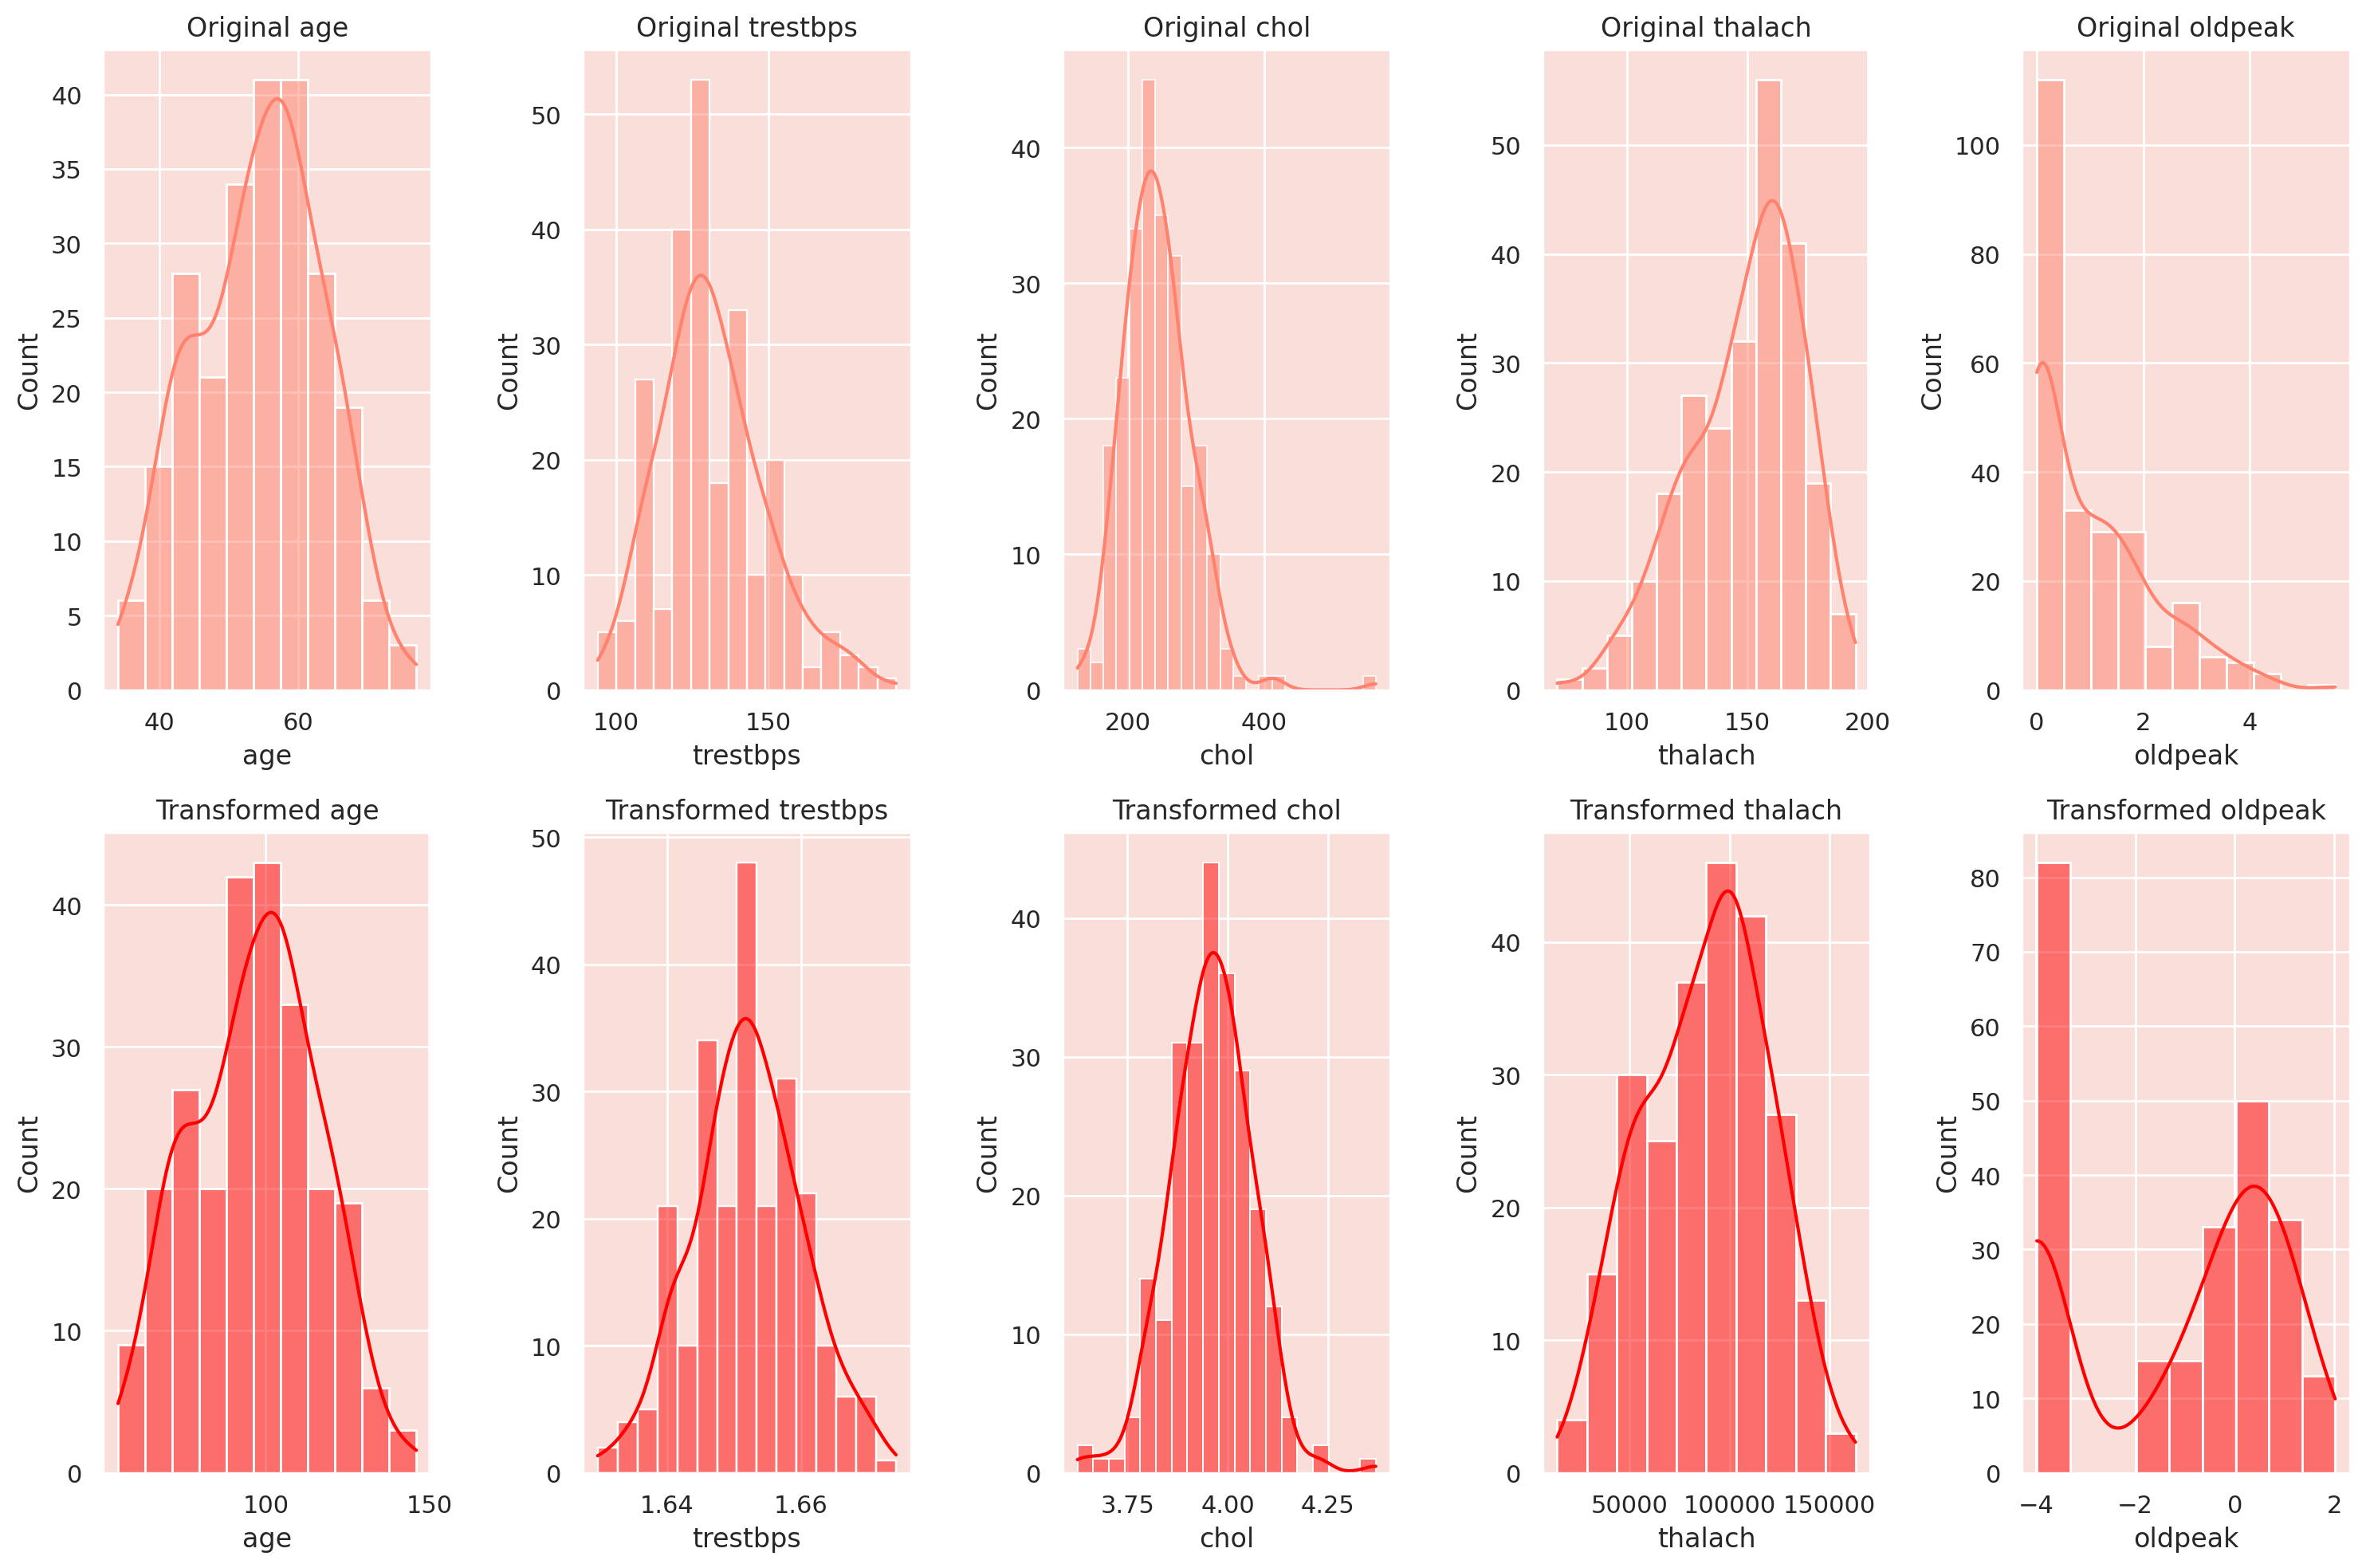

In [29]:
# Comprobación de la distribución de las características continuas
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Distribuciones originales
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')

# Aplicación de la transformación Box-Cox
# Diccionario para almacenar valores lambda para cada característica
lambdas = {}

for i, col in enumerate(continuous_features):
    # Aplicar box-cox solo para valores positivos
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Aplicar la misma lambda a los datos de prueba
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
<h2 align="left"><font color=red>Inferencia:</font></h2>

__1- `age`__: La transformación ha hecho que la distribución `age` sea más simétrica, acercándola a una distribución normal.

__2- `Trestbps`__: La distribución de `trestbps` después de la transformación parece ser más parecida a la normal, con una asimetría reducida.

__3- `Chol`__: Después de aplicar la transformación de Box-Cox, `chol` exhibe una forma que está más alineada con una distribución normal.

__4- `Thalach`__: La característica `thalach` ya era bastante simétrica antes de la transformación y, después de la transformación, continúa mostrando una forma similar, lo que indica que su distribución original era cercana a la normal.

__5- `Oldpeak`__: La transformación mejoró la distribución `oldpeak`, pero aún no se parece perfectamente a una distribución normal. Esto podría deberse a la naturaleza inherente de los datos o a la presencia de valores atípicos. Para mejorar su normalidad, podríamos considerar utilizar transformaciones avanzadas como la transformación de Yeo-Johnson, que puede manejar valores cero y negativos directamente.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
<h2 align="left"><font color=red>Conclusión:</font></h2>

Transformar las características para que se parezcan más a la normalidad ayuda principalmente a mitigar el impacto de los valores atípicos, lo que es particularmente beneficioso para algoritmos basados ​​en la distancia como __SVM__ y __KNN__. Al reducir la influencia de los valores atípicos__, garantizamos que estos algoritmos puedan calcular distancias de manera más efectiva y producir resultados más confiables.

In [30]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
269,99.775363,1,1.652121,4.044511,1,34193.227632,1,0.490856,0,0,False,False,False,False,False,False,False,True
191,104.060287,1,1.651135,3.909224,0,61564.640490,1,0.846853,1,3,False,False,False,False,False,False,False,True
15,87.096593,0,1.646936,3.916243,0,97354.894861,0,0.490856,1,0,False,True,False,True,False,False,True,False
224,95.519188,1,1.641027,3.960431,0,55975.891019,1,1.130195,1,1,False,False,False,True,False,False,False,True
250,89.190732,1,1.656715,4.069855,0,51729.486474,1,1.634849,1,3,False,False,False,True,False,False,False,True


<a id="dt"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 6 | Construcción de modelos de árboles de decisión(DT)</p>

⬆️ [Tabla de contenido](#contents_tabel)

____
<a id="dt_base"></a>
# <b><span style='color:#ff826e'>Paso 6.1 |</span><span style='color:red'> Definición del modelo base DT</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Primero, definamos el modelo DT:

In [31]:

dt_base = DecisionTreeClassifier(random_state=0)

____
<a id="dt_hp"></a>
# <b><span style='color:#ff826e'>Paso 6.2 |</span><span style='color:red'> Ajuste de hiperparámetros de DT</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

__🔍<span style="font-size:130%; color:red"> Nota: </span>__ En los escenarios médicos, especialmente en el contexto del diagnóstico de enfermedades, a menudo es más importante __tener un alto nivel de recuperación (sensibilidad) para la clase positiva (pacientes con la afección)__. Un alto nivel de recuperación garantiza que la mayoría de los casos positivos reales se identifiquen correctamente, incluso si eso significa algunos falsos positivos (casos en los que se clasifica erróneamente a individuos sanos como portadores de la afección). La razón es que, por lo general, es mejor tener algunas falsas alarmas que perder la oportunidad de diagnosticar a un paciente con una posible enfermedad.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Estoy estableciendo una función para determinar el conjunto óptimo de hiperparámetros que produzcan la mayor recuperación del modelo. Este enfoque garantiza un marco reutilizable para el ajuste de hiperparámetros de modelos posteriores:

In [32]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    Esta función optimiza los hiperparámetros de un clasificador mediante la búsqueda en una cuadrícula de hiperparámetros específica.
    Utiliza GridSearchCV y validación cruzada (StratifiedKFold) para evaluar diferentes combinaciones de hiperparámetros.
    La combinación con la recuperación más alta para la clase 1 se selecciona como la métrica de puntuación predeterminada.
    La función devuelve el clasificador con los hiperparámetros óptimos.
    '''

    #Cree el objeto de validación cruzada utilizando StratifiedKFold para garantizar que la distribución de clases sea la misma en todos los pliegues
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    #Crear el objeto GridSearchCV
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Ajuste el objeto GridSearchCV a los datos de entrenamiento
    clf_grid.fit(X_train, y_train)

    # Obtenga los mejores hiperparámetros
    best_hyperparameters = clf_grid.best_params_

    # Devuelve el atributo best_estimator_ que nos da el mejor modelo que se ha ajustado a los datos de entrenamiento
    return clf_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our DT model:

In [33]:
# Cuadrícula de hiperparámetros para DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [34]:
# Llama a la función para ajustar los hiperparámetros
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [35]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


____
<a id="dt_eval"></a>
# <b><span style='color:#ff826e'>Paso 6.3 |</span><span style='color:red'> Evaluación del modelo DT</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Ahora evaluemos el rendimiento de nuestro modelo DT en los conjuntos de datos de entrenamiento y de prueba:

In [36]:
# Evalua el modelo optimizado en los datos del tren
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



In [37]:
# Evalua el modelo optimizado en los datos de prueba
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Dado que los valores métricos para los conjuntos de datos de entrenamiento y de prueba están estrechamente alineados y no son significativamente diferentes, el modelo no parece estar sobreajustado.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Creemos una función que consolide las métricas de cada modelo en un marco de datos, facilitando una comparación de extremo a extremo de todos los modelos más adelante:

In [38]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evalúa el rendimiento de un modelo entrenado en datos de prueba utilizando varias métricas.
    """
    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Obtener informe de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)

    #Extracción de métricas
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convertir diccionario a marco de datos
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df

In [39]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


<a id="rf"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 7 | Construcción de modelos de bosque aleatorio(Random Forest)</p>

⬆️ [Tabla de contenido](#contents_tabel)

____
<a id="rf_base"></a>
# <b><span style='color:#ff826e'>Paso 7.1 |</span><span style='color:red'> Definición del modelo base de RF</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Primero, definamos el modelo RF base:

In [40]:
rf_base = RandomForestClassifier(random_state=0)

____
<a id="rf_hp"></a>
# <b><span style='color:#ff826e'>Paso 7.2 |</span><span style='color:red'> Ajuste de hiperparámetros de RF</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
Luego, configuro la cuadrícula de hiperparámetros y utilizo la función __tune_clf_hyperparameters__ para identificar los hiperparámetros óptimos para nuestro modelo de RF:

In [41]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [42]:
# Uso de la función tune_clf_hyperparameters para obtener el mejor estimador
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('Hiperparámetros óptimos de RF: \n', best_rf_hyperparams)

Hiperparámetros óptimos de RF: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


____
<a id="rf_eval"></a>
# <b><span style='color:#ff826e'>Paso 7.3 |</span><span style='color:red'> Evaluación del modelo RF</b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Finalmente, estoy evaluando el rendimiento del modelo en los conjuntos de datos de entrenamiento y de prueba:

In [43]:
# Evaluar el modelo optimizado en los datos del entrenamiento
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.83      0.87      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [44]:
# Evaluar el modelo optimizado en los datos de prueba
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

El rendimiento similar del modelo RF en los datos de entrenamiento y de prueba sugiere que no hay sobreajuste.

In [45]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84


<a id="knn"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 8 | Construcción del modelo KNN</p>

⬆️ [Tabla de contenido](#contents_tabel)

____
<a id="knn_base"></a>
# <b><span style='color:#ff826e'>Paso 8.1 |</span><span style='color:red'> Definición del modelo base de KNN</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

En primer lugar, definamos el modelo KNN base y configuremos la canalización con escalamiento:

In [46]:
# Defina el modelo KNN base y configure la canalización con escalamiento
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

____
<a id="knn_hp"></a>
# <b><span style='color:#ff826e'>Paso 8.2 |</span><span style='color:red'> Ajuste de hiperparámetros de KNN</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Se configura la cuadrícula de hiperparámetros y utilizaré la función __tune_clf_hyperparameters__ para identificar los hiperparámetros óptimos para nuestra canalización KNN:

In [47]:
# Cuadrícula de hiperparámetros para KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Distancia de Manhattan, 2: Distancia euclidiana
}

In [48]:
# Ajuste de hiperparámetros para KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('Hiperparámetros óptimos de KNN: \n', best_knn_hyperparams)

Hiperparámetros óptimos de KNN: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


____
<a id="knn_eval"></a>
# <b><span style='color:#ff826e'>Paso 8.3 |</span><span style='color:red'> Evaluación del modelo KNN</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Evaluamoss el rendimiento del modelo en los conjuntos de datos de entrenamiento y de prueba:

In [49]:
# Evaluar el modelo optimizado en los datos del tren
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [50]:
# Evaluar el modelo optimizado en los datos de prueba
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Los puntajes consistentes del modelo KNN en los conjuntos de entrenamiento y prueba indican que no hay sobreajuste.

In [51]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 9 | Construcción del modelo SVM</p>

⬆️ [Tabla de contenido](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Paso 9.1 |</span><span style='color:red'> Definición del modelo base de SVM</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Primero, definamos el modelo SVM base y configuremos la canalización con escalamiento:

In [52]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Paso 9.2 |</span><span style='color:red'> Ajuste de hiperparámetros de SVM</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
Configuremos la cuadrícula de hiperparámetros y empleemos la función __tune_clf_hyperparameters__ para determinar los mejores hiperparámetros para nuestra canalización SVM:

In [53]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}

In [54]:
# Llamar a la función para ajustar los hiperparámetros
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('Hiperparámetros óptimos de SVM: \n', best_svm_hyperparams)

Hiperparámetros óptimos de SVM: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Paso 9.3 |</span><span style='color:red'> Evaluación del modelo SVM</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Evaluemos el rendimiento de nuestro modelo SVM en los conjuntos de datos de entrenamiento y de prueba:

In [55]:
# Evaluar el modelo optimizado en los datos del tren
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       110
           1       0.71      0.96      0.82       132

    accuracy                           0.77       242
   macro avg       0.82      0.75      0.75       242
weighted avg       0.81      0.77      0.76       242



In [56]:
# Evaluar el modelo optimizado en los datos de prueba
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">
    
<h2 align="left"><font color=red>✅ Inferencia:</font></h2>

El __recall de 0,97 para la clase 1__ indica que casi todos los __casos positivos verdaderos (es decir, pacientes con enfermedad cardíaca)__ se identifican correctamente. Este alto nivel de recall es de suma importancia en un contexto médico, donde pasar por alto a un paciente con una posible enfermedad cardíaca podría tener consecuencias nefastas.

Sin embargo, también vale la pena destacar el desempeño equilibrado del modelo. Con un __F1-score de 0,83 para la clase 1__, es evidente que el modelo no se centra simplemente en maximizar el recall a expensas de la precisión. Esto significa que la reducción de los falsos negativos no ha aumentado significativamente los falsos positivos, lo que garantiza que el costo y el esfuerzo de examinar a individuos sanos no sean innecesariamente altos.

En general, el rendimiento del modelo es prometedor para el diagnóstico médico, especialmente cuando se prioriza la identificación precisa de pacientes con enfermedades cardíacas sin sobrecargar el sistema con falsas alarmas.

In [57]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79


<a id="conclusion"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Paso 10 | Conclusión</p>

⬆️ [Tabla de contenido](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

En el contexto crítico del diagnóstico de enfermedades cardíacas, nuestro objetivo principal es __garantizar un alto índice de recuperación de la clase positiva__. Es imperativo identificar con precisión cada caso potencial de enfermedad cardíaca, ya que incluso un diagnóstico erróneo podría tener consecuencias nefastas. Sin embargo, mientras nos esforzamos por lograr este alto índice de recuperación, es esencial mantener un rendimiento equilibrado para evitar intervenciones médicas innecesarias en personas sanas. Ahora evaluaremos nuestros modelos en relación con estos parámetros médicos cruciales.



In [58]:
# Concatenar dataframes
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Ordenar por 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84
DT,0.80,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


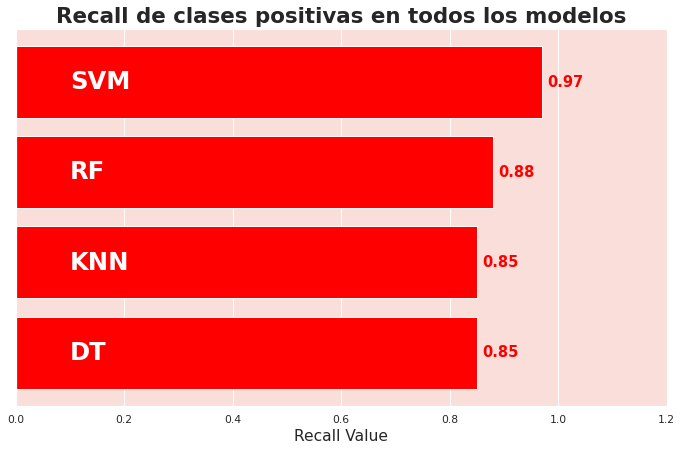

In [59]:
# Ordenar valores según 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Dibuje el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Anotar los valores e índices
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Eliminar yticks
ax.set_yticks([])

# Establecer el límite del eje x
ax.set_xlim([0, 1.2])

# Agregar título y xlabel
plt.title("Recall de clases positivas en todos los modelos", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

__El modelo SVM demuestra una capacidad encomiable para reconocer a posibles pacientes cardíacos. Con una tasa de recuperación de 0,97 para la clase 1, es evidente que casi todos los pacientes con enfermedades cardíacas se identifican correctamente. Esto es de suma importancia en un entorno médico. Sin embargo, el rendimiento equilibrado del modelo garantiza que, si bien apunta a una alta tasa de recuperación, no se compromete la precisión, por lo que no se sobrecarga el sistema con alertas innecesarias.__
